# Universidad de las Ciencias Informáticas 
## Facultad de Tecnologias Educativas 
### Asignatura: Aprendizaje Automatico

---

# **Informe del Proceso KDD aplicado al Dataset "Netflix Titles" para la Tarea Extraclase**

## **Autor:** Frank Ernesto Cortiñas Peña  
## **Carrera:** Ingeniería en Ciencias Informáticas  
## **Año:** 2025  

---

## Profesor(a): Stephani de la Caridad   
## Grupo: 401  

---




# 1. Introducción

El presente proyecto aplica la metodología KDD (Knowledge Discovery in Databases) al dataset *Netflix Titles*, el cual contiene información descriptiva sobre series y películas disponibles en la plataforma Netflix. El objetivo principal es desarrollar un proceso de descubrimiento de conocimiento que permita construir modelos capaces de clasificar si un título corresponde a una película (*Movie*) o una serie (*TV Show*).

El conjunto de datos contiene 8 807 registros y 12 atributos, incluyendo título, reparto, director, país, duración, rating, año de lanzamiento y géneros asociados. La naturaleza de estos atributos combina datos categóricos, numéricos y texto, por lo que es necesario aplicar técnicas de limpieza y transformación.

El problema a resolver es de **clasificación supervisada**, utilizando tres algoritmos de minería de datos:

- **K-Nearest Neighbors (K-NN)**  
  - *Ventajas:* simple, no paramétrico, buena precisión con datos bien distribuidos.  
  - *Desventajas:* sensible al ruido, lento con grandes volúmenes.  
  - *Aplicaciones:* sistemas de recomendación, reconocimiento de patrones.

- **ID3 (DecisionTreeClassifier)**  
  - *Ventajas:* fácil de interpretar, no requiere escalamiento, maneja variables categóricas.  
  - *Desventajas:* propenso al sobreajuste, sensible a cambios mínimos en los datos.  
  - *Aplicaciones:* clasificación en marketing, salud, detección de fraude.

- **Random Forest** (algoritmo elegido adicionalmente)  
  - *Ventajas:* robusto, reduce sobreajuste, maneja alta dimensionalidad.  
  - *Desventajas:*


# 2. Selección del Conjunto de Datos

El dataset empleado proviene del repositorio público de Kaggle y contiene información sobre títulos publicados en Netflix. Este dataset es adecuado para tareas de clasificación debido a la variable `type` que especifica si un registro es una película (*Movie*) o serie (*TV Show*).

A continuación, se cargan y describen las características principales del conjunto de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')
#import time
#import os

df = pd.read_csv("Data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:

df.shape


(8807, 12)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Caracteristicas del Dataset:
- Calificacion: Clasificacion Binaria
- Dimension: 8807 Registros
- Atributos: Multivaluados (Integer,Text,String)

# 2. Limpieza de Datos

# 2.1.1 Análisis Exploratorio de Datos (EDA)

Antes de proceder con el preprocesamiento y modelado, es fundamental comprender la estructura, calidad y características del conjunto de datos. Este análisis exploratorio nos permitirá identificar patrones, valores atípicos, relaciones entre variables y posibles problemas de calidad de datos que deberán abordarse en las etapas posteriores.

In [4]:

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 2.1.2 Información general del dataset

In [5]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Información básica sobre las columnas
print("\nInformación detallada de las columnas:")
df.info()

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas básicas:")
display(df.describe(include='all').T)

# Tipos de contenido únicos
print("\nTipos de contenido únicos:")
print(df['type'].value_counts())
print("\nProporción de tipos de contenido:")
print(df['type'].value_counts(normalize=True))

Dimensiones del dataset: 8807 filas y 12 columnas

Información detallada de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Estadísticas descriptivas básicas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de contenido únicos:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Proporción de tipos de contenido:
type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64


# 2.1.3 Análisis de valores faltantes

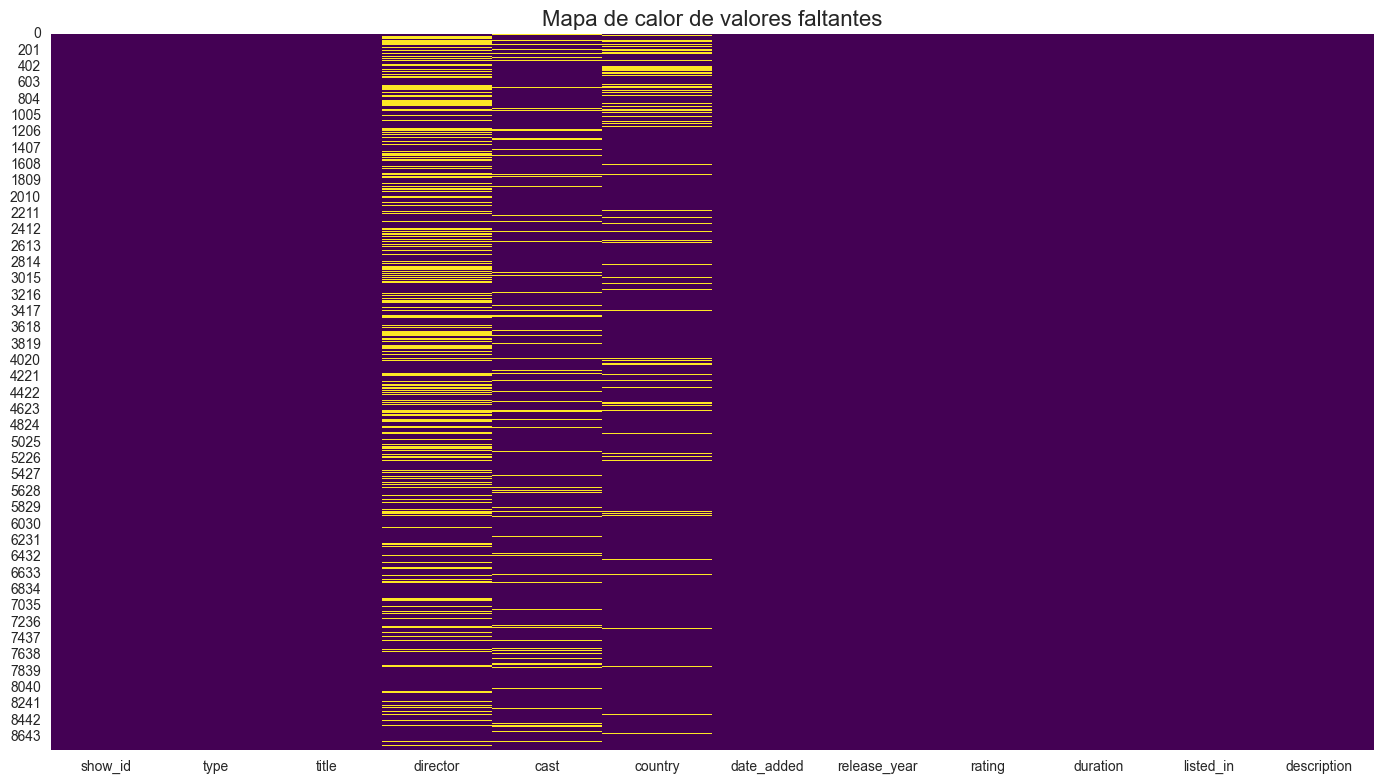

Columnas con valores faltantes:


,Valores faltantes,Porcentaje (%)
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064


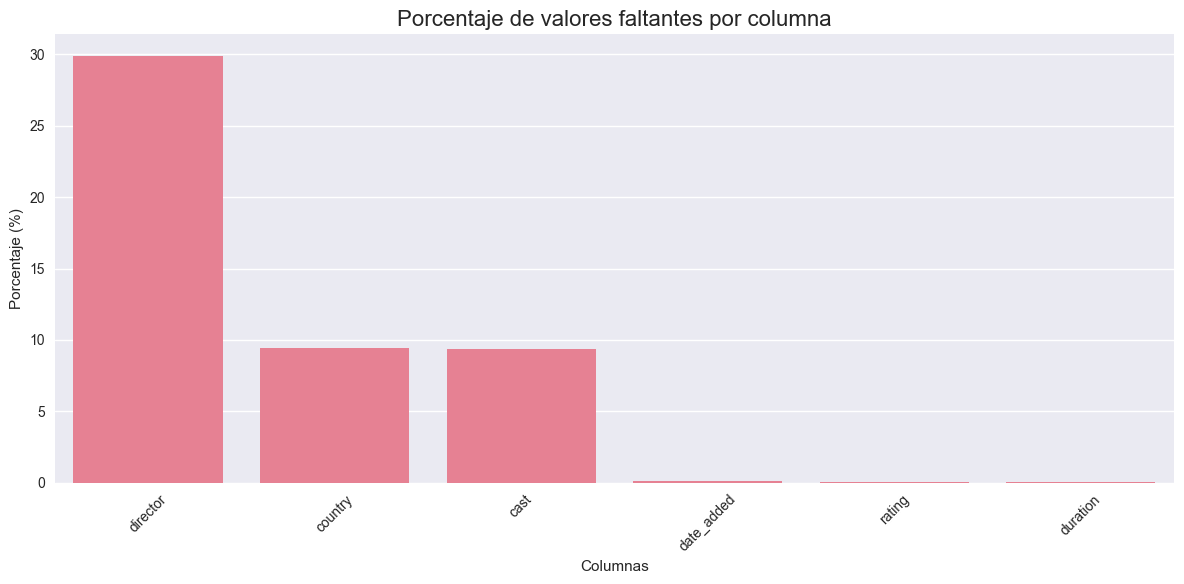

In [6]:
# Visualización de valores faltantes
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes', fontsize=16)
plt.tight_layout()
plt.savefig('missing_values_heatmap.png')
plt.show()

# Porcentaje de valores faltantes por columna
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Valores faltantes': missing_values, 'Porcentaje (%)': missing_percent})
missing_df = missing_df[missing_df['Valores faltantes'] > 0]

print("Columnas con valores faltantes:")
display(missing_df)

# Visualización del porcentaje de valores faltantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y=missing_df['Porcentaje (%)'])
plt.title('Porcentaje de valores faltantes por columna', fontsize=16)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('missing_values_percentage.png')
plt.show()

# 2.1.4 Análisis de variables categóricas

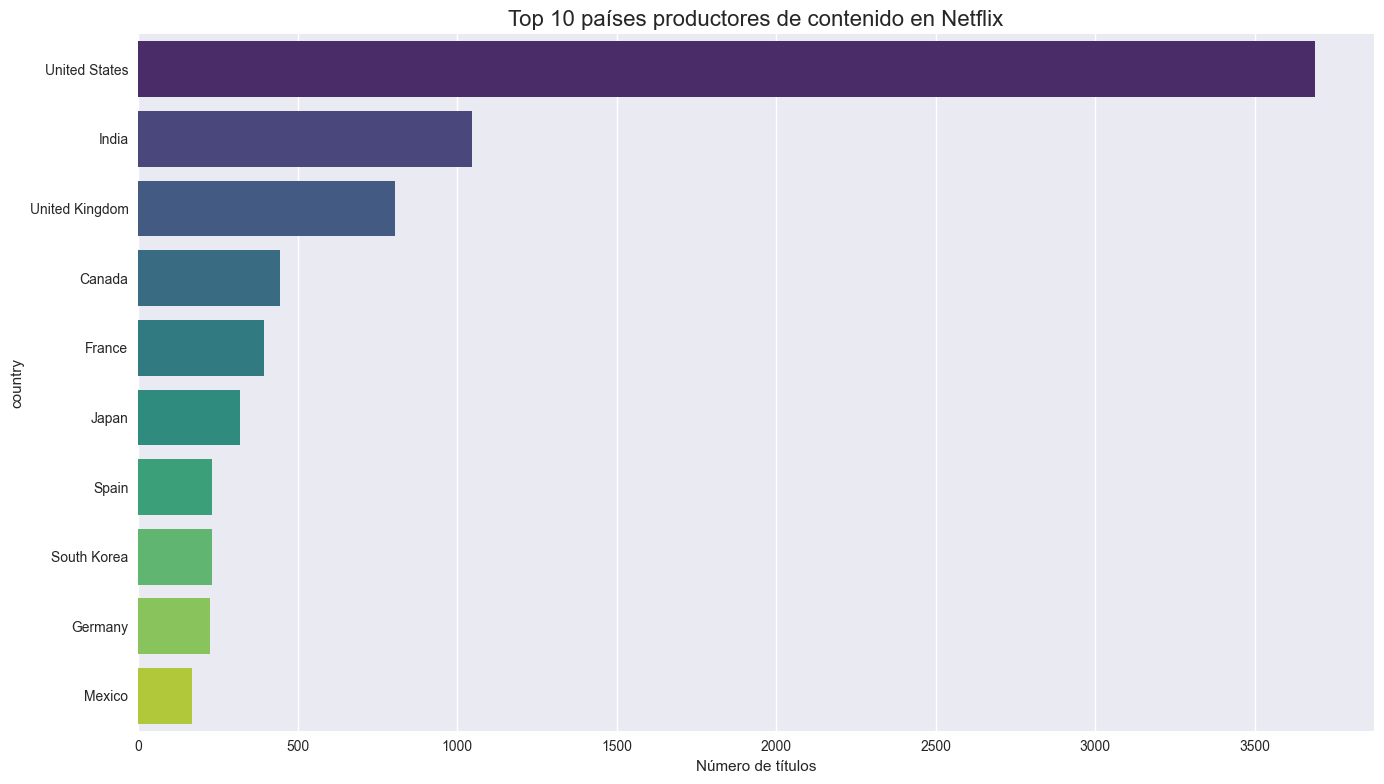

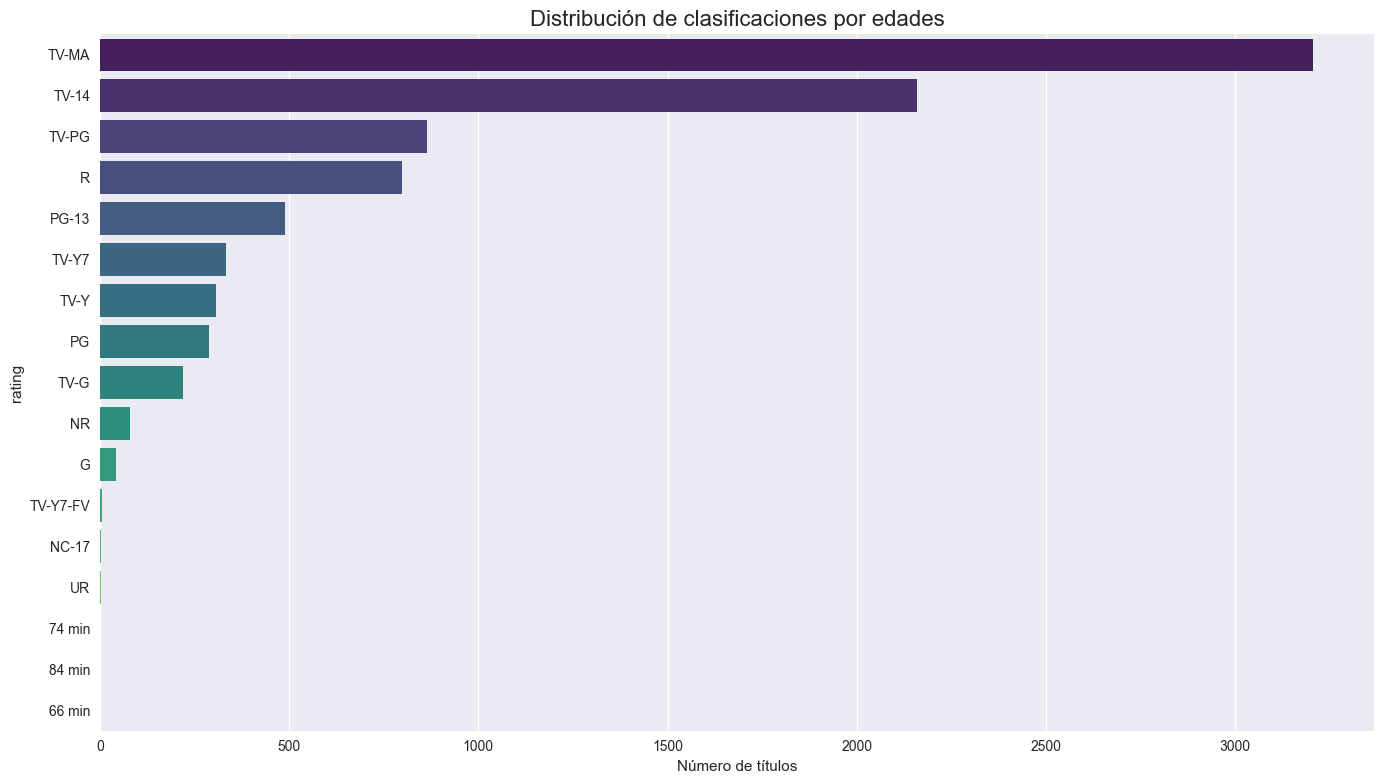

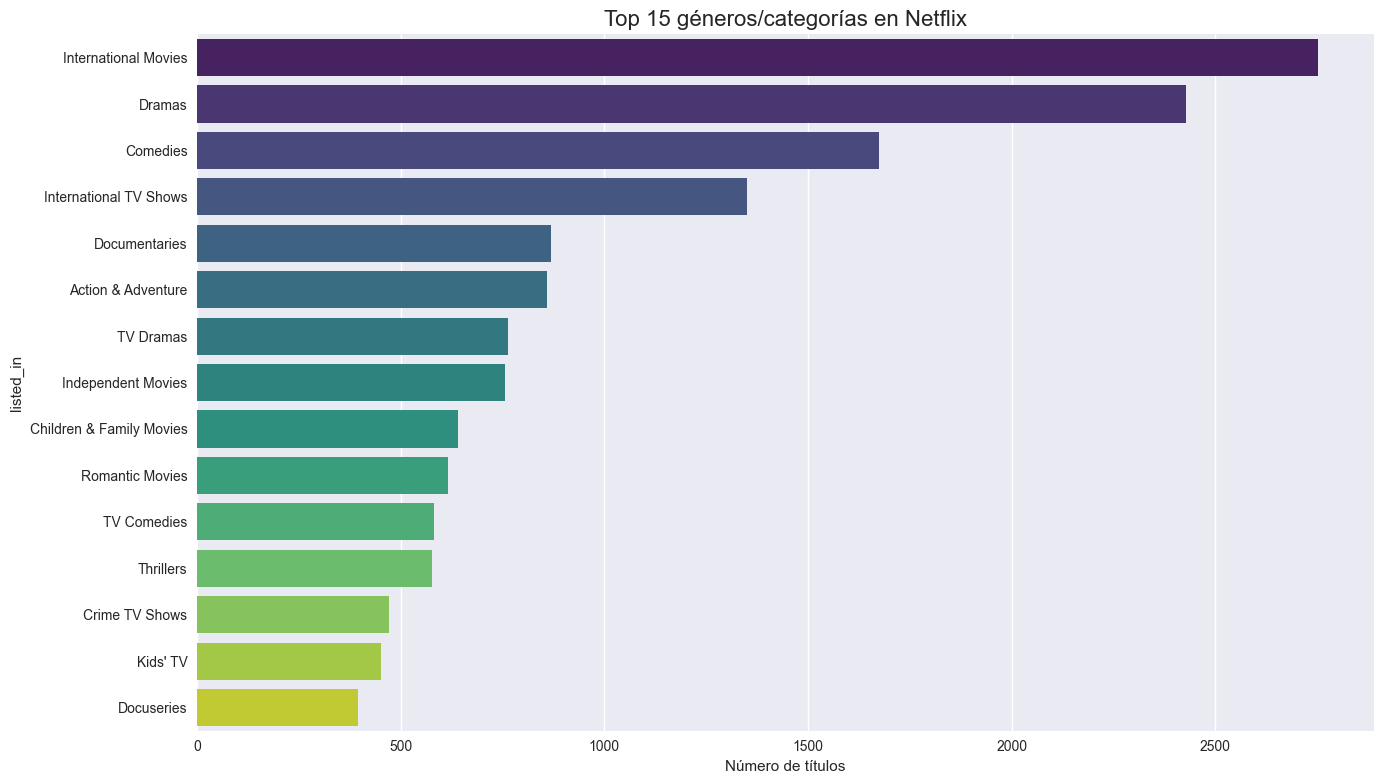

In [7]:
# Análisis de la variable 'country' (países de producción)
# Limpieza y preparación para el análisis
country_data = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = country_data.value_counts().head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 países productores de contenido en Netflix', fontsize=16)
plt.xlabel('Número de títulos')
plt.tight_layout()
plt.savefig('top_countries.png')
plt.show()

# rating
rating_counts = df['rating'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='viridis')
plt.title('Distribución de clasificaciones por edades', fontsize=16)
plt.xlabel('Número de títulos')
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

# Análisis de generos
categories = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x=categories.values, y=categories.index, palette='viridis')
plt.title('Top 15 géneros/categorías en Netflix', fontsize=16)
plt.xlabel('Número de títulos')
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

# 2.1.5 Análisis comparativo entre películas y series

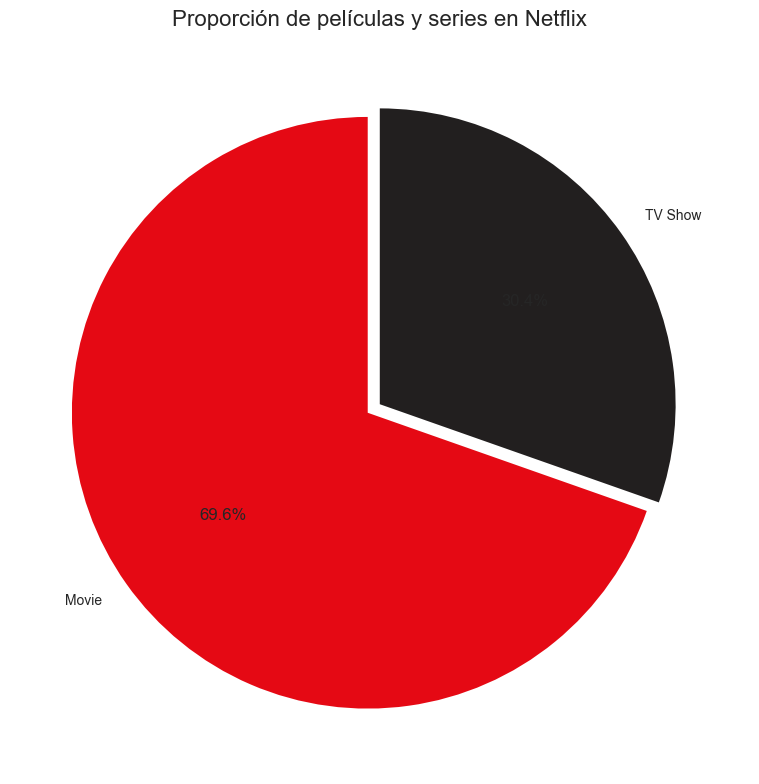

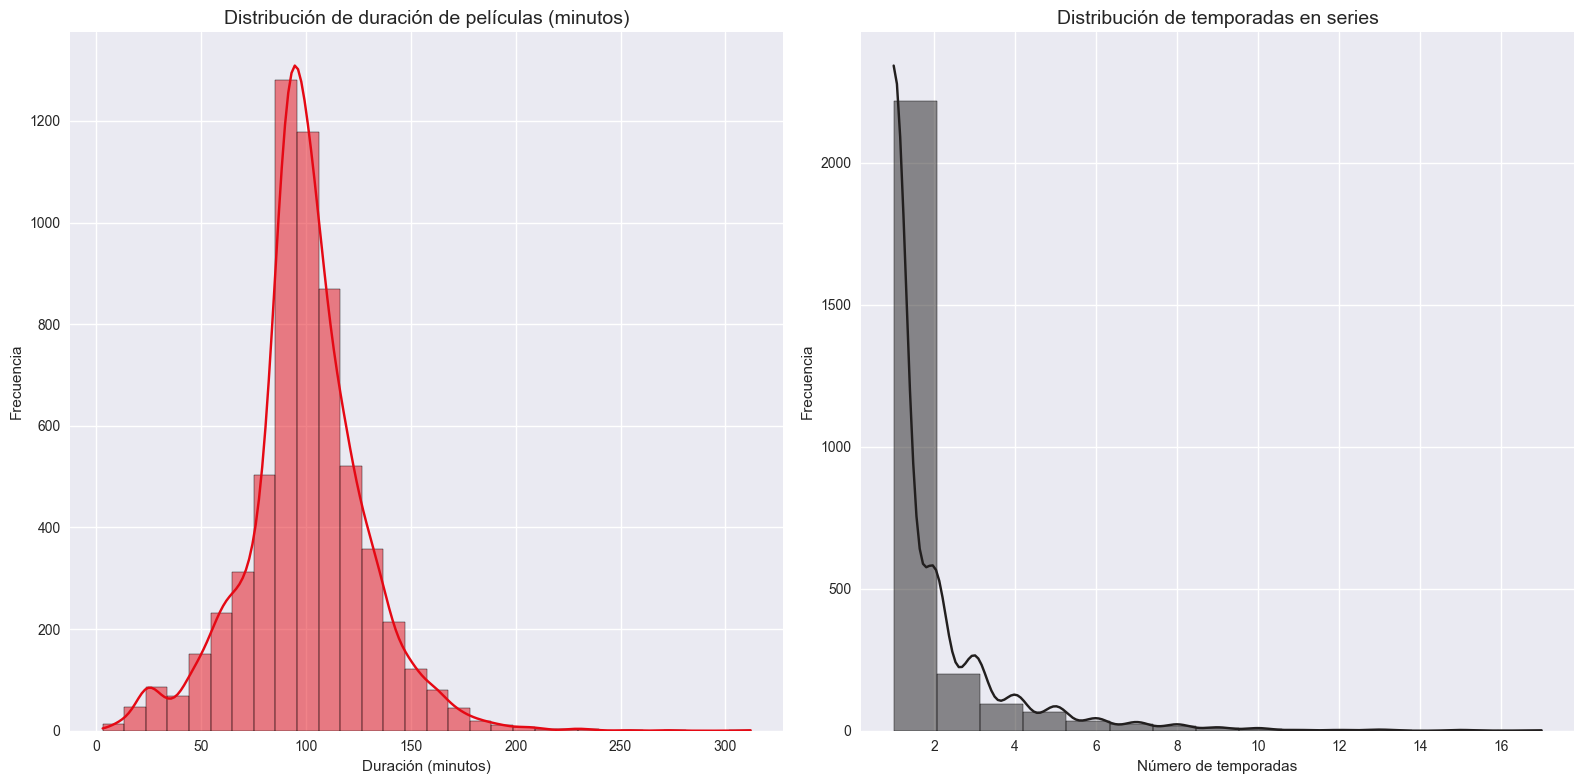

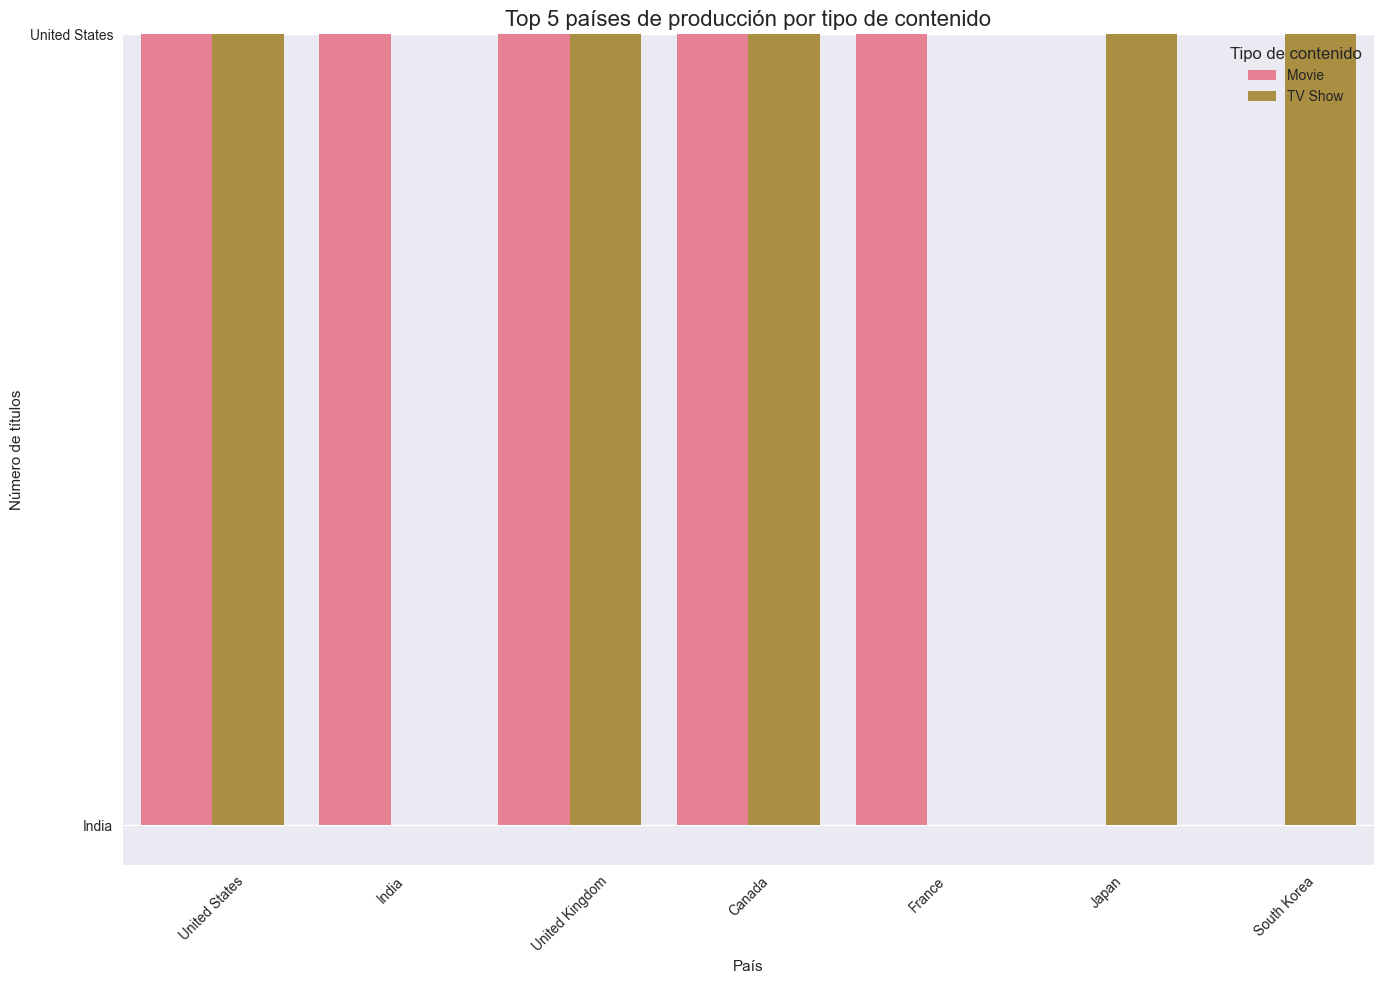

In [8]:
# Contenido por tipo (películas vs series)
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
        colors=['#E50914', '#221F1F'], startangle=90, explode=(0.05, 0))
plt.title('Proporción de películas y series en Netflix', fontsize=16)
plt.tight_layout()
plt.savefig('content_type_pie.png')
plt.show()

# Duración promedio por tipo de contenido
# Convertir duración a formato numérico para análisis
df['duration_clean'] = df['duration'].str.extract('(\d+)').astype(float)

# Comparar
movie_duration = df[df['type'] == 'Movie']['duration_clean']
tv_show_seasons = df[df['type'] == 'TV Show']['duration_clean']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# peliculas
sns.histplot(movie_duration.dropna(), bins=30, kde=True, ax=ax1, color='#E50914')
ax1.set_title('Distribución de duración de películas (minutos)', fontsize=14)
ax1.set_xlabel('Duración (minutos)')
ax1.set_ylabel('Frecuencia')

# series
sns.histplot(tv_show_seasons.dropna(), bins=15, kde=True, ax=ax2, color='#221F1F')
ax2.set_title('Distribución de temporadas en series', fontsize=14)
ax2.set_xlabel('Número de temporadas')
ax2.set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('duration_comparison.png')
plt.show()

# prod por tipo de contenido
country_data_type = df.dropna(subset=['country']).copy()
country_data_type['country_list'] = country_data_type['country'].str.split(',')
country_data_type = country_data_type.explode('country_list')
country_data_type['country_clean'] = country_data_type['country_list'].str.strip()

top_countries_by_type = country_data_type.groupby('type')['country_clean'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index()

plt.figure(figsize=(14, 10))
sns.barplot(data=top_countries_by_type, x='country_clean', y='country_clean', hue='type', estimator=lambda x: len(x), errorbar=None)
plt.title('Top 5 países de producción por tipo de contenido', fontsize=16)
plt.xlabel('País')
plt.ylabel('Número de títulos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de contenido')
plt.tight_layout()
plt.savefig('countries_by_type.png')
plt.show()

# 2.1.6 Análisis de relaciones entre variables

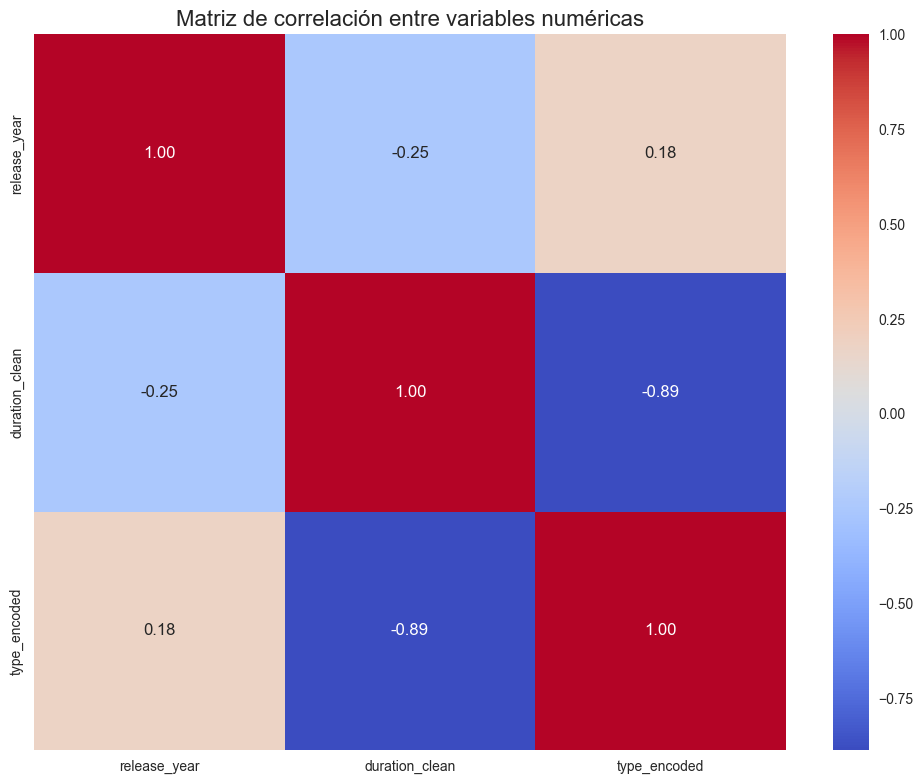

In [9]:
# correlacion numerica
num_df = df[['release_year', 'duration_clean']].dropna()
num_df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()



# 2.1.7 Conclusiones del EDA

In [10]:
# resumen
print("Resumen de hallazgos clave del Análisis Exploratorio:\n")

# 1. calidad
missing_summary = df.isnull().mean() * 100
high_missing = missing_summary[missing_summary > 20]
if not high_missing.empty:
    print(f"1. Calidad de datos: Se identificaron columnas con más del 20% de valores faltantes:")
    for col, percent in high_missing.items():
        print(f"   - {col}: {percent:.1f}% de valores faltantes")
else:
    print("1. Calidad de datos: No se encontraron columnas con más del 20% de valores faltantes")

# 2. Distribución de contenido
movie_pct = (df['type'].value_counts()['Movie'] / len(df)) * 100
tvshow_pct = (df['type'].value_counts()['TV Show'] / len(df)) * 100
print(f"\n2. Distribución de contenido:")
print(f"   - Películas: {movie_pct:.1f}% del catálogo")
print(f"   - Series: {tvshow_pct:.1f}% del catálogo")



# 3. paises productores
top_country = country_data.value_counts().index[0]
top_country_count = country_data.value_counts().iloc[0]
print(f"\n4. Producción global:")
print(f"   - {top_country} es el principal país productor con {top_country_count} títulos")
print(f"   - Netflix muestra una diversidad significativa de contenido internacional")

# 5. por generos
top_genre = categories.index[0]
top_genre_count = categories.iloc[0]
print(f"\n5. Géneros predominantes:")
print(f"   - '{top_genre}' es el género más común con {top_genre_count} títulos")



Resumen de hallazgos clave del Análisis Exploratorio:

1. Calidad de datos: Se identificaron columnas con más del 20% de valores faltantes:
   - director: 29.9% de valores faltantes

2. Distribución de contenido:
   - Películas: 69.6% del catálogo
   - Series: 30.4% del catálogo

4. Producción global:
   - United States es el principal país productor con 3690 títulos
   - Netflix muestra una diversidad significativa de contenido internacional

5. Géneros predominantes:
   - 'International Movies' es el género más común con 2752 títulos


El análisis exploratorio realizado ha proporcionado una comprensión profunda del conjunto de datos de Netflix, identificando sus características principales, calidad de datos y patrones significativos. Estos hallazgos serán fundamentales para guiar las decisiones en la etapa de preprocesamiento y para la selección de características relevantes para el modelo de clasificación.

# 2.2 Limpieza de los Datos

En esta etapa se identifican valores faltantes, se eliminan o transforman atributos no útiles, y se prepara la base para su modelado.

Se realizaron los siguientes pasos:
- Eliminación de columnas irrelevantes para la clasificación.
- Limpieza de valores nulos.
- Transformación de variables categóricas.
- Conversión de `duration` a formato numérico (minutos).


In [11]:
df.isnull().sum()

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added          10
release_year         0
rating               4
duration             3
listed_in            0
description          0
duration_clean       3
dtype: int64

## Eliminación de columnas irrelevantes para la clasificación.

In [12]:
# eliminacion de columnas irrelevantes
df_clean = df.drop(columns=["show_id", "description", "cast", "director"])


## Limpieza de valores nulos.

In [13]:
# nulos
df_clean = df_clean.dropna()


## Transformación de variables categóricas.

In [14]:
# asegurar que la columna sea string
df_clean["duration"] = df_clean["duration"].astype(str)

# extraer el numero (sin warnings)
df_clean["duration"] = df_clean["duration"].str.extract(r"(\d+)")

# convertir a entero (coerce evita errores)
df_clean["duration"] = pd.to_numeric(df_clean["duration"], errors='coerce')

# eliminar valores NaN reventao
df_clean = df_clean.dropna(subset=["duration"])


## Muestrario de Avance

In [15]:
df_clean.head()


,type,title,country,date_added,release_year,rating,duration,listed_in,duration_clean
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries,90.0
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2.0
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2.0
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies",125.0
8,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV",9.0


# 3. Preprocesamineto

Para poder entrenar los modelos de aprendizaje automático, es necesario transformar los datos a un formato numérico que los algoritmos puedan procesar. Las variables categóricas, como type, country, rating y listed_in, deben ser codificadas adecuadamente ya que los modelos no pueden interpretar valores de texto directamente. En esta etapa se aplican dos técnicas fundamentales de codificación:

- Label Encoding a type: Dado que la variable objetivo (type) es binaria (solo contiene dos categorías: "Movie" y "TV Show"), se utiliza Label Encoding para convertirla a valores numéricos (0 y 1). Esta técnica asigna un valor entero único a cada categoría, transformando "Movie" en 0 y "TV Show" en 1. Es apropiada para la variable objetivo en problemas de clasificación binaria ya que mantiene la información de clase sin aumentar la dimensionalidad del dataset.
- One Hot Encoding al resto de variables categóricas: Para las variables predictoras categóricas (country, rating, listed_in, etc.), se aplica One Hot Encoding, que crea nuevas columnas binarias (0/1) para cada posible valor de la variable original. Por ejemplo, para la variable country, se crearían columnas como country_United States, country_India, country_Spain, etc., donde un 1 indica que el título pertenece a ese país y 0 en caso contrario. Esta técnica es preferible para variables predictoras porque evita que el modelo interprete relaciones ordinales inexistentes entre categorías (como si "Estados Unidos" > "México" numéricamente).

### Este proceso de transformación tiene importantes implicaciones:

- Aumento dimensional: One Hot Encoding puede incrementar significativamente el número de características, especialmente para variables con muchos valores únicos como country o listed_in.
- Eliminación de multicolinealidad: Se aplica el parámetro drop_first=True para eliminar una columna de cada variable categórica transformada, evitando problemas de multicolinealidad donde una columna puede predecirse perfectamente a partir de otras.
- Preservación de información: A diferencia de otras técnicas de codificación, One Hot Encoding preserva completamente la información categórica sin introducir relaciones numéricas artificiales.

### Finalmente se separan los conjuntos X e Y:

X contiene todas las características predictoras (variables independientes) transformadas numéricamente
y contiene únicamente la variable objetivo (type) codificada con Label Encoding
Esta separación es fundamental para el proceso de entrenamiento supervisado, permitiendo que los algoritmos aprendan la relación entre las características de entrada (X) y la variable objetivo (y) que se desea predecir. El resultado es un dataset completamente numérico, listo para ser procesado por los algoritmos de aprendizaje automático en la siguiente etapa del proceso KDD.


In [16]:
from sklearn.preprocessing import LabelEncoder

# codificación de la variable objetivo ()
encoder = LabelEncoder()
df_clean["type"] = encoder.fit_transform(df_clean["type"])


### One Hot Encoding

In [17]:
df_model = pd.get_dummies(df_clean, drop_first=True)


In [18]:
X = df_model.drop(columns=["type"])
y = df_model["type"]


# 4. Minería de Datos

En esta etapa se entrenan los tres algoritmos seleccionados para el problema de clasificación binaria (distinguir entre películas y series de TV):

- **K-Nearest Neighbors (KNN)**
- **Árbol de Decisión (ID3)**
- **Random Forest**

Todos los modelos son evaluados sobre el mismo conjunto de entrenamiento y prueba para garantizar una comparación justa. A continuación, se detalla cada algoritmo con sus fundamentos matemáticos, ventajas, desventajas y aplicaciones prácticas.

## K-Nearest Neighbors (KNN)

**Fundamentos matemáticos:**  
KNN es un algoritmo de aprendizaje supervisado basado en instancia. Para clasificar un nuevo punto, KNN identifica los K puntos más cercanos en el espacio de características y asigna la clase predominante entre ellos. La distancia se calcula comúnmente usando la distancia euclidiana:

$$d(x, x_i) = \sqrt{\sum_{j=1}^{n}(x_j - x_{i,j})^2}$$

Donde $x$ es el vector de características del nuevo punto, $x_i$ es el vector de características del punto $i$ en el conjunto de entrenamiento, y $n$ es el número de características.

**Ventajas:**
- Simple de implementar e interpretar
- No requiere fase de entrenamiento explícita (perezoso)
- Funciona bien con fronteras de decisión no lineales
- Adaptable a nuevos datos sin reentrenamiento completo

**Desventajas:**
- Costo computacional alto durante la predicción (O(n))
- Sensible a características irrelevantes o con diferentes escalas
- Requiere normalización de datos
- Elección crítica del parámetro K

**Aplicaciones prácticas:**  
KNN se utiliza frecuentemente en sistemas de recomendación (como Netflix), reconocimiento de patrones, diagnóstico médico y clasificación de imágenes. Por ejemplo, Netflix podría usar KNN para recomendar películas similares basándose en las características de visualización de usuarios con gustos similares.

**Relevancia para este problema:**  
KNN es adecuado para nuestro problema porque puede identificar patrones en las características de películas y series (duración, país de origen, géneros) sin asumir una distribución específica de los datos.

## Árbol de Decisión (ID3)

**Fundamentos matemáticos:**  
ID3 (Iterative Dichotomiser 3) construye un árbol de decisión mediante división recursiva de los datos usando el concepto de entropía e información ganada. La entropía mide la impureza de un conjunto:

$$H(S) = -\sum_{i=1}^{c} p_i \log_2 p_i$$

Donde $S$ es el conjunto de datos, $c$ es el número de clases y $p_i$ es la proporción de elementos de clase $i$ en $S$.

La ganancia de información para un atributo $A$ se calcula como:

$$IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)$$

Donde $S_v$ es el subconjunto de $S$ para el cual el atributo $A$ tiene valor $v$.

**Ventajas:**
- Fácil de entender e interpretar visualmente
- No requiere normalización de datos
- Maneja tanto variables numéricas como categóricas
- Identifica características importantes para la predicción
- Robusto a valores atípicos

**Desventajas:**
- Propenso al sobreajuste sin poda adecuada
- Inestable (pequeños cambios en datos causan árboles diferentes)
- Puede crear árboles sesgados con variables dominantes
- No siempre genera el árbol óptimo globalmente

**Aplicaciones prácticas:**  
Los árboles de decisión se utilizan en diagnóstico médico (identificar enfermedades basadas en síntomas), evaluación crediticia (aprobar/rechazar préstamos), minería de datos empresariales y detección de fraude. Por ejemplo, un banco podría usar un árbol de decisión para determinar si aprobar un préstamo basándose en ingresos, historial crediticio y edad del solicitante.

**Relevancia para este problema:**  
ID3 es útil para nuestro problema porque puede capturar reglas interpretables como "si la duración es mayor a 60 minutos y el país es Estados Unidos, entonces es probable que sea una película", lo que permite comprender los factores que distinguen películas de series.

## Random Forest

**Fundamentos matemáticos:**  
Random Forest es un ensemble method que combina múltiples árboles de decisión entrenados con muestras bootstrap del conjunto de datos original (bagging) y seleccionando aleatoriamente un subconjunto de características en cada división. La predicción final se obtiene por votación mayoritaria:

$$f_{RF}(x) = \text{mode}\{f_{T_1}(x), f_{T_2}(x), \dots, f_{T_n}(x)\}$$

Donde $f_{T_i}(x)$ es la predicción del árbol $i$ y $n$ es el número total de árboles.

El error del ensemble se relaciona con la correlación entre árboles y su fuerza individual:

$$Error_{RF} \approx \bar{\rho} \sqrt{E_i(1-E_i)}$$

Donde $\bar{\rho}$ es la correlación promedio entre pares de árboles y $E_i$ es el error promedio de cada árbol individual.

**Ventajas:**
- Alta precisión y robustez
- Reduce significativamente el sobreajuste respecto a árboles individuales
- Maneja alta dimensionalidad y características irrelevantes
- Proporciona métricas de importancia de características
- Paralelizable (entrenamiento eficiente)
- No requiere validación cruzada para selección de parámetros

**Desventajas:**
- Menos interpretable que un solo árbol de decisión
- Requiere más recursos computacionales
- Puede sobreajustar en datos ruidosos o con alta dimensionalidad
- Tiempo de predicción más lento que modelos más simples

**Aplicaciones prácticas:**  
Random Forest se utiliza ampliamente en bioinformática (identificación de genes relevantes), finanzas (detección de fraudes), visión por computadora (reconocimiento de imágenes), y sistemas de recomendación. Un ejemplo concreto es la detección de transacciones fraudulentas en tarjetas de crédito, donde múltiples árboles pueden identificar patrones complejos de comportamiento fraudulento.

**Relevancia para este problema:**  
Random Forest es particularmente adecuado para nuestro problema debido a la naturaleza heterogénea de las características del dataset (categóricas como país y género, numéricas como duración y año de lanzamiento). Su capacidad para manejar características correlacionadas y su robustez ante valores faltantes lo hacen ideal para analizar el catálogo diverso de Netflix.

## Proceso de Evaluación

Para garantizar una comparación justa, todos los modelos se entrenan y evalúan usando la misma división de datos (70% entrenamiento, 30% prueba) y las mismas métricas de evaluación (precision, recall, F1-score, accuracy). La aleatoriedad en la división de datos se controla mediante una semilla fija (random_state=42) para garantizar reproducibilidad de los resultados.

Este enfoque sistemático permite identificar qué algoritmo proporciona el mejor rendimiento para la tarea específica de clasificación de contenido de Netflix, considerando tanto la precisión como la capacidad de generalización a nuevos datos.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


### En esta etapa se entrenan los tres algoritmos seleccionados con visualizaciones que muestran su funcionamiento interno:

- K-Nearest Neighbors (KNN): Visualización de fronteras de decisión y vecinos más cercanos
- Árbol de Decisión (ID3): Representación gráfica de la estructura del árbol
- Random Forest: Análisis de importancia de características y visualización de árboles individuales

Todos los modelos son evaluados sobre el mismo conjunto de entrenamiento y prueba. Las visualizaciones se generan automáticamente durante el entrenamiento para facilitar la comprensión de cómo cada algoritmo procesa los datos.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import graphviz
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

# visual
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de datos para visualización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


colors = ['red', 'blue']  # Movie=0 (rojo), TV Show=1 (azul) 
class_names = ['Movie', 'TV Show']

## K-Nearest Neighbors (KNN)

ENTRENANDO MODELO KNN (K=5)

Precisión del modelo KNN: 0.997907

Reporte de clasificación:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1694
     TV Show       1.00      1.00      1.00       695

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389



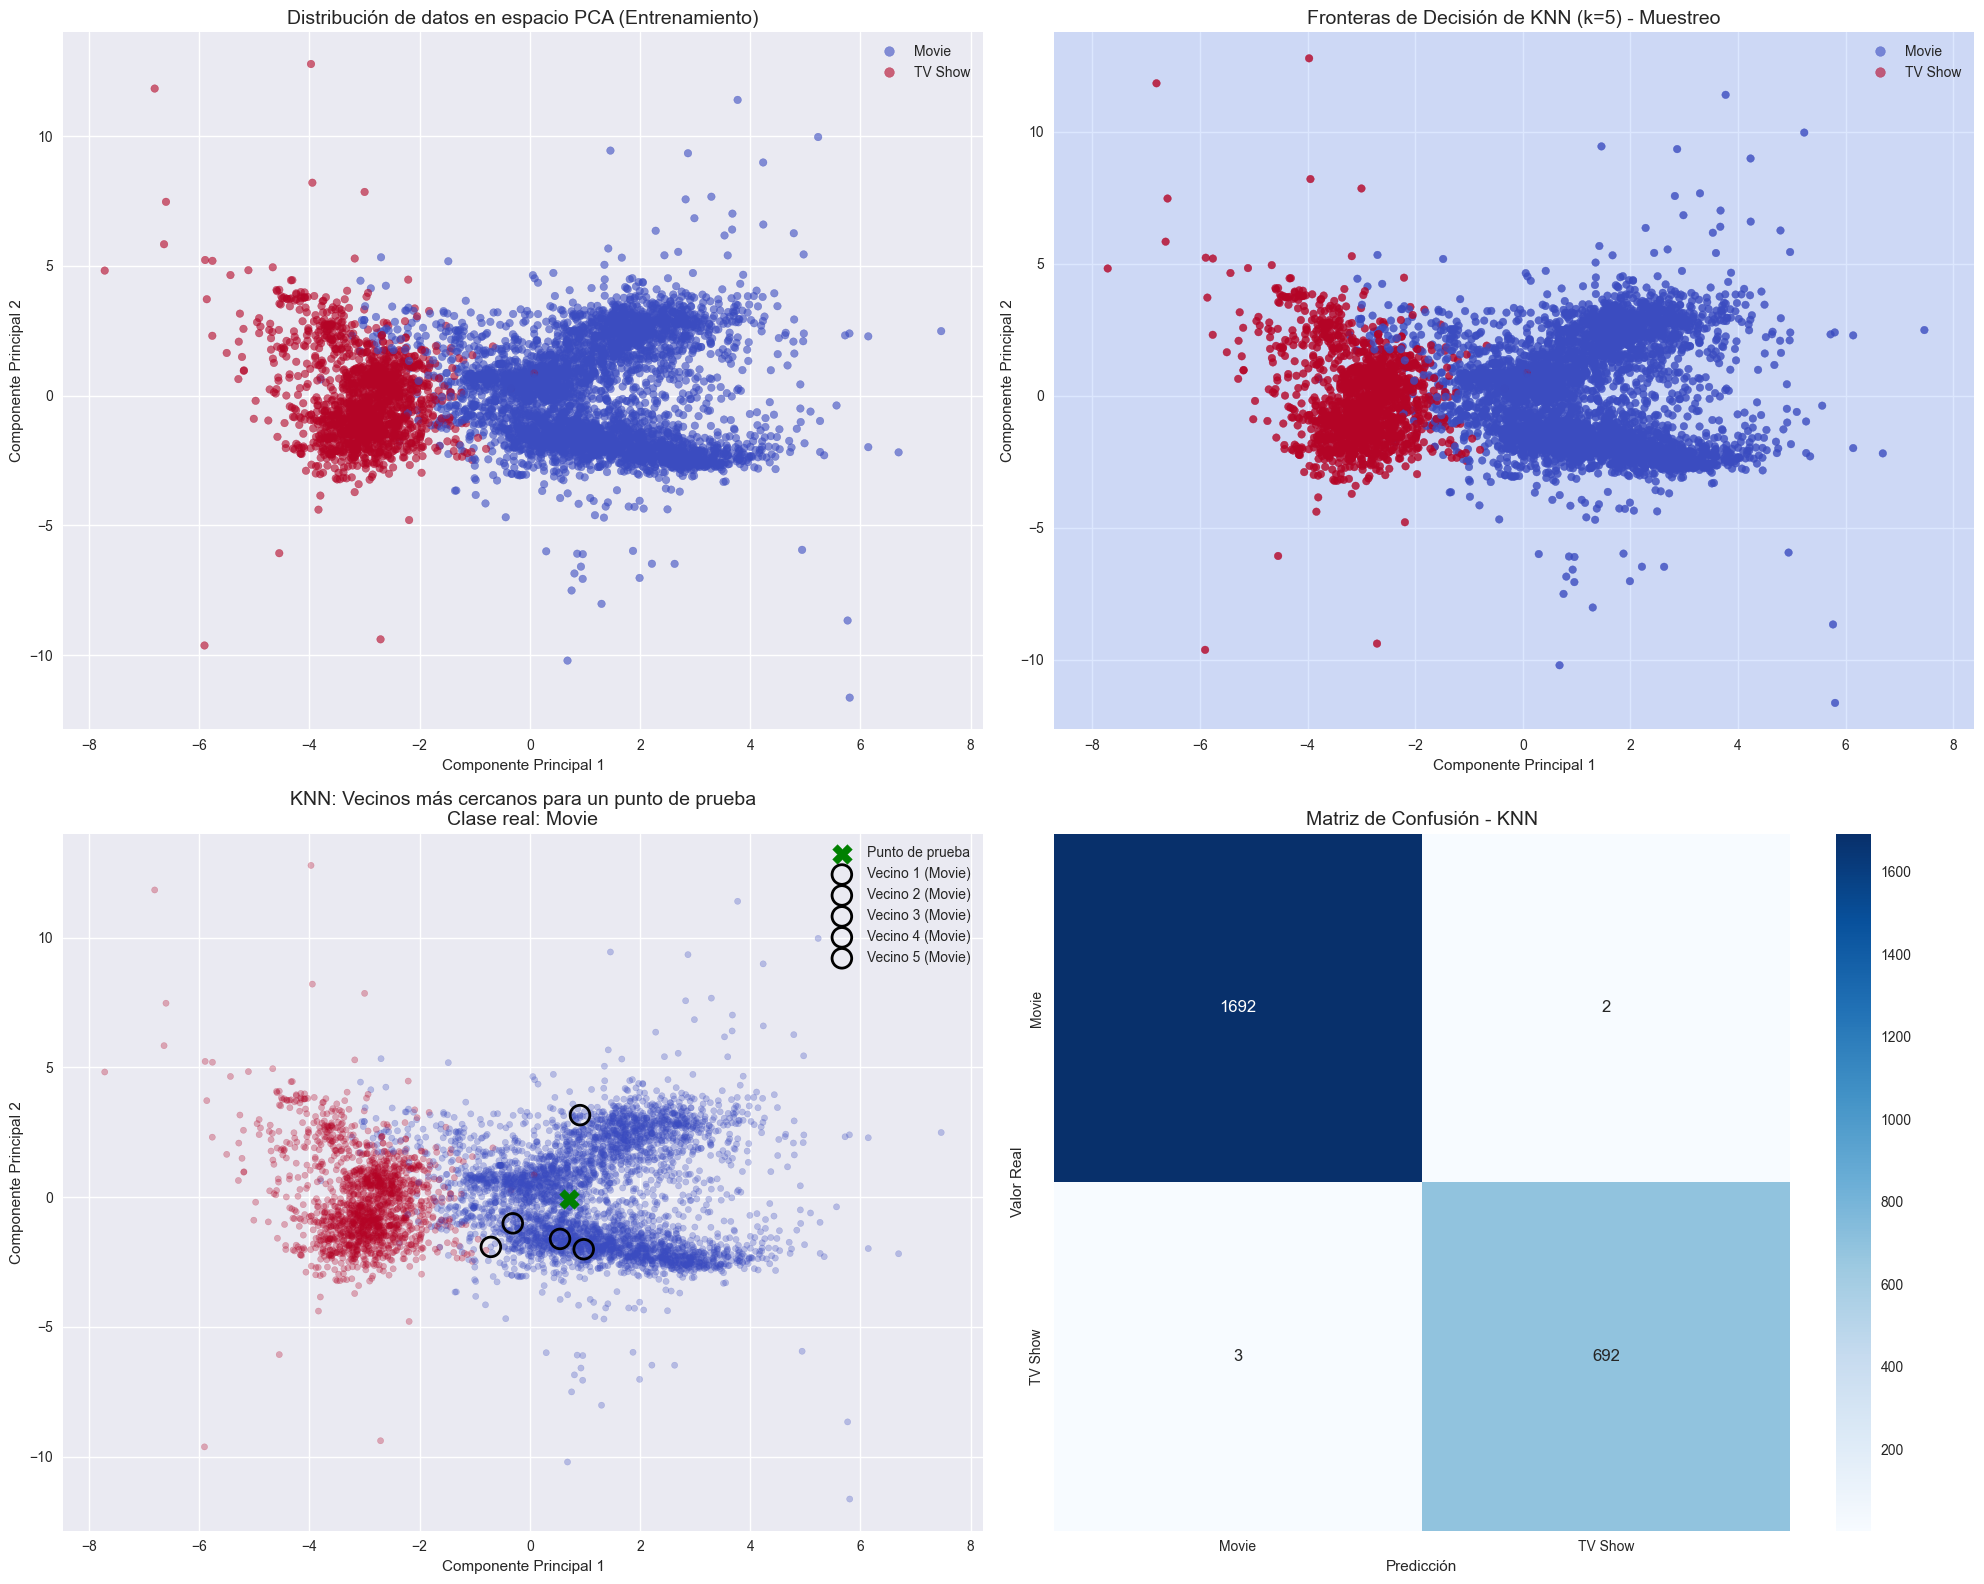

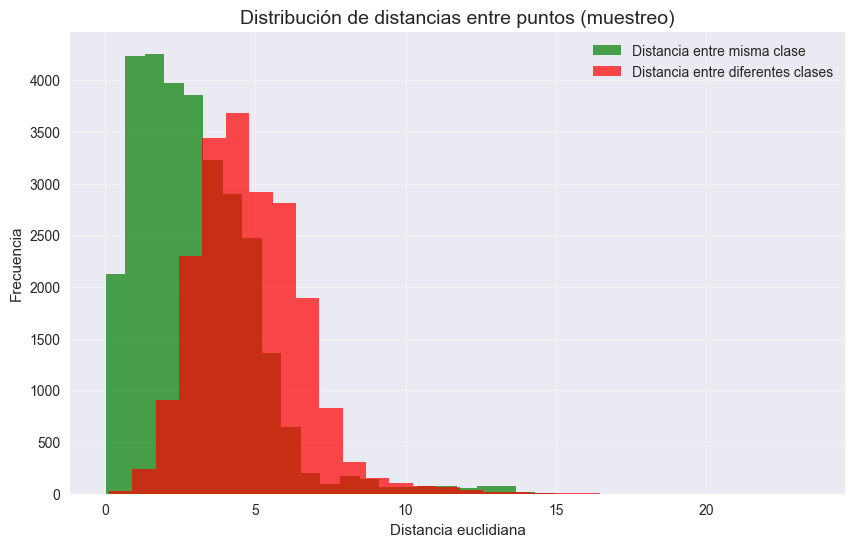

In [21]:
print("="*60)
print("ENTRENANDO MODELO KNN (K=5)")
print("="*60)

# Entrenamiento del modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluación
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nPrecisión del modelo KNN: {acc_knn:.6f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

# === VISUALIZACIONES KNN === sale por consola el avance de todo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Visualización de los datos en el espacio PCA
scatter = ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
                     c=y_train, cmap='coolwarm', alpha=0.6, s=30)
ax1.set_title('Distribución de datos en espacio PCA (Entrenamiento)', fontsize=14)
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')
ax1.legend(handles=scatter.legend_elements()[0], labels=class_names)

# 2. Fronteras de decisión
h = 0.1 
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Crear matriz para los resultados (inicializada con un valor por defecto)
Z = np.zeros_like(xx)

# Muestrear puntos estratégicos para la predicción
grid_points = np.c_[xx.ravel(), yy.ravel()]


max_points = 5000  # OJO cuidado aca puede generar problemas de rendimiento
if len(grid_points) > max_points:
    indices = np.random.choice(len(grid_points), max_points, replace=False)
    sampled_points = grid_points[indices]
    
    # Predecir puntos muestreados
    original_space_samples = pca.inverse_transform(sampled_points)
    Z_sampled = knn.predict(original_space_samples)
    
    # Crear una matriz completa con los resultados muestreados
    Z_flat = np.zeros(len(grid_points))
    Z_flat[indices] = Z_sampled
    Z = Z_flat.reshape(xx.shape)
else:
    # Si hay pocos puntos, predecir para todos (repito ojo rendimiento)
    original_space_samples = pca.inverse_transform(grid_points)
    Z_flat = knn.predict(original_space_samples)
    Z = Z_flat.reshape(xx.shape)

# Contorno de las fronteras de decisión (basado en muestreo)
contour = ax2.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
           c=y_train, cmap='coolwarm', alpha=0.8, s=30)
ax2.set_title('Fronteras de Decisión de KNN (k=5) - Muestreo', fontsize=14)
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.legend(handles=scatter.legend_elements()[0], labels=class_names)

# 3. Ejemplo de vecinos más cercanos para un punto de prueba
sample_idx = 0
sample_point = X_test_pca[sample_idx].reshape(1, -1)
sample_class = y_test.iloc[sample_idx]

# Encontrar los 5 vecinos más cercanos en el espacio original o un K=5...
distances, indices = knn.kneighbors(X_test.iloc[sample_idx:sample_idx+1])
neighbors_classes = y_train.iloc[indices[0]]

# Mostrar el punto de prueba y sus vecinos
ax3.scatter(X_train_pca[:, 0], X_train_pca[:, 1], 
           c=y_train, cmap='coolwarm', alpha=0.3, s=20)
ax3.scatter(X_test_pca[sample_idx, 0], X_test_pca[sample_idx, 1], 
           c='green', marker='X', s=200, label='Punto de prueba')
    
# Marcar los vecinos mas cercanos
for i, idx in enumerate(indices[0]):
    ax3.scatter(X_train_pca[idx, 0], X_train_pca[idx, 1], 
               edgecolor='black', facecolor='none', s=200, linewidth=2,
               label=f'Vecino {i+1} ({class_names[neighbors_classes.iloc[i]]})')

ax3.set_title(f'KNN: Vecinos más cercanos para un punto de prueba\nClase real: {class_names[sample_class]}', fontsize=14)
ax3.set_xlabel('Componente Principal 1')
ax3.set_ylabel('Componente Principal 2')
ax3.legend(loc='best')

# 4. Matriz de confusion
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4,
            xticklabels=class_names, yticklabels=class_names)
ax4.set_title('Matriz de Confusión - KNN', fontsize=14)
ax4.set_xlabel('Predicción')
ax4.set_ylabel('Valor Real')

plt.tight_layout()
plt.savefig('knn_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Gráfico interactivo adicional: Distancia promedio por clase

plt.figure(figsize=(10, 6))

# Limites
max_samples = 1000
if len(X_train_pca) > max_samples:
    indices = np.random.choice(len(X_train_pca), max_samples, replace=False)
    X_sample = X_train_pca[indices]
    y_sample = y_train.iloc[indices].values
else:
    X_sample = X_train_pca
    y_sample = y_train.values

# Calcular distancias promedio entre puntos de la misma clase y de clases diferentes
same_class_dists = []
diff_class_dists = []

# Límite adicional para evitar bucles muy grandes (control de performance)
max_comparisons = 50000
count = 0

for i in range(len(X_sample)):
    if count >= max_comparisons:
        break
    for j in range(i+1, len(X_sample)):
        if count >= max_comparisons:
            break
        dist = np.linalg.norm(X_sample[i] - X_sample[j])
        if y_sample[i] == y_sample[j]:
            same_class_dists.append(dist)
        else:
            diff_class_dists.append(dist)
        count += 1

plt.hist(same_class_dists, bins=30, alpha=0.7, label='Distancia entre misma clase', color='green')
plt.hist(diff_class_dists, bins=30, alpha=0.7, label='Distancia entre diferentes clases', color='red')
plt.title('Distribución de distancias entre puntos (muestreo)', fontsize=14)
plt.xlabel('Distancia euclidiana')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('knn_distance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Árbol de Decisión (ID3)

ENTRENANDO MODELO ÁRBOL DE DECISIÓN (ID3)

Precisión del modelo Árbol de Decisión: 0.997488

Reporte de clasificación:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1694
     TV Show       1.00      1.00      1.00       695

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389



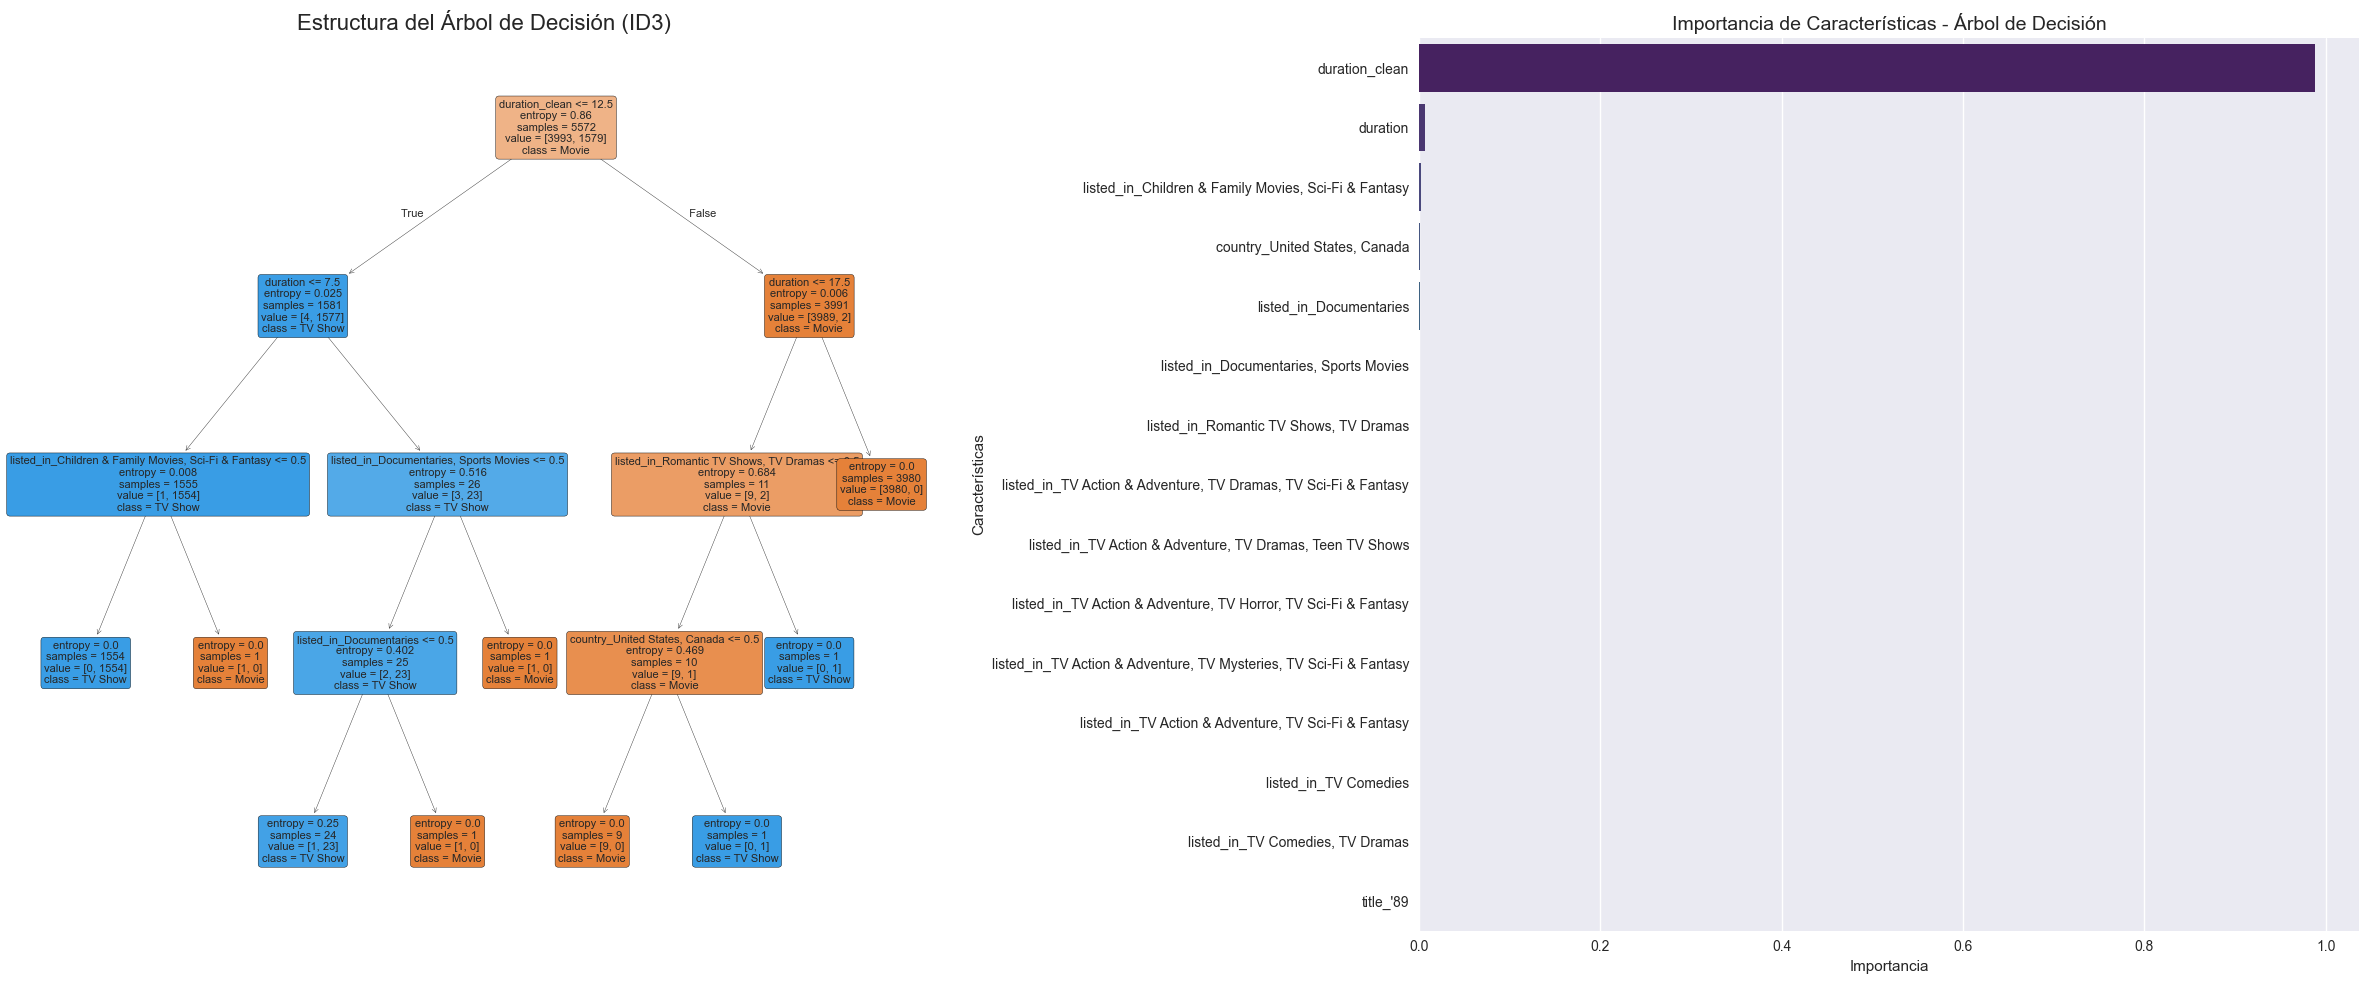

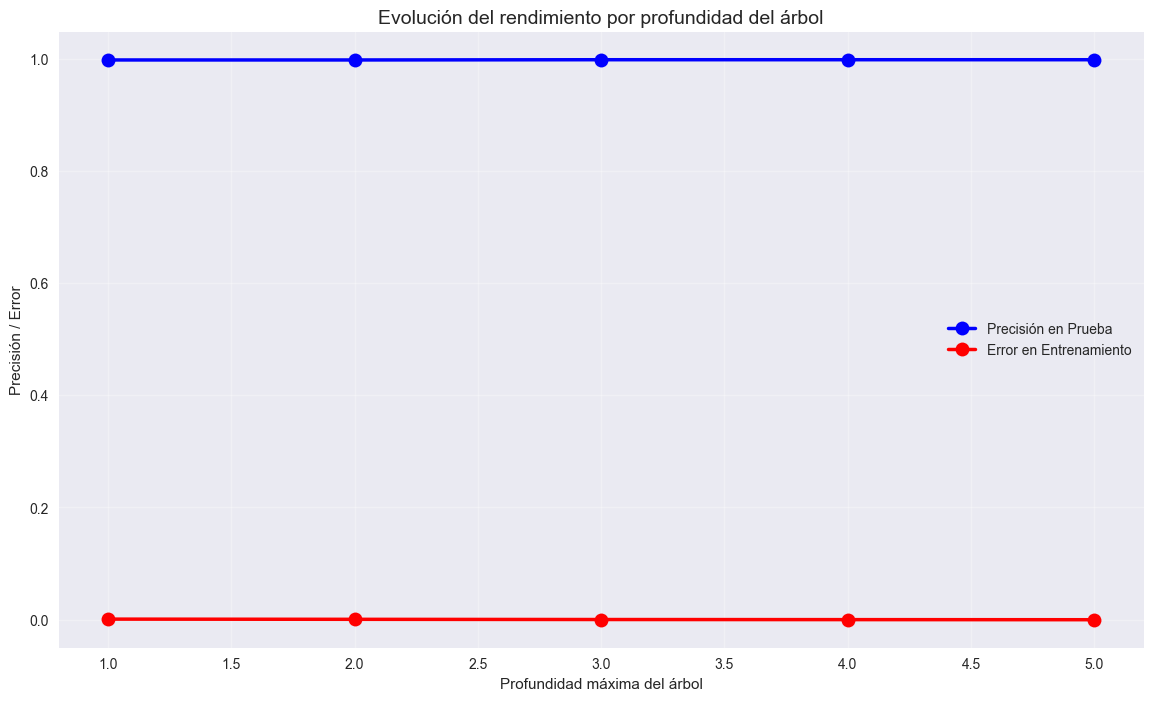

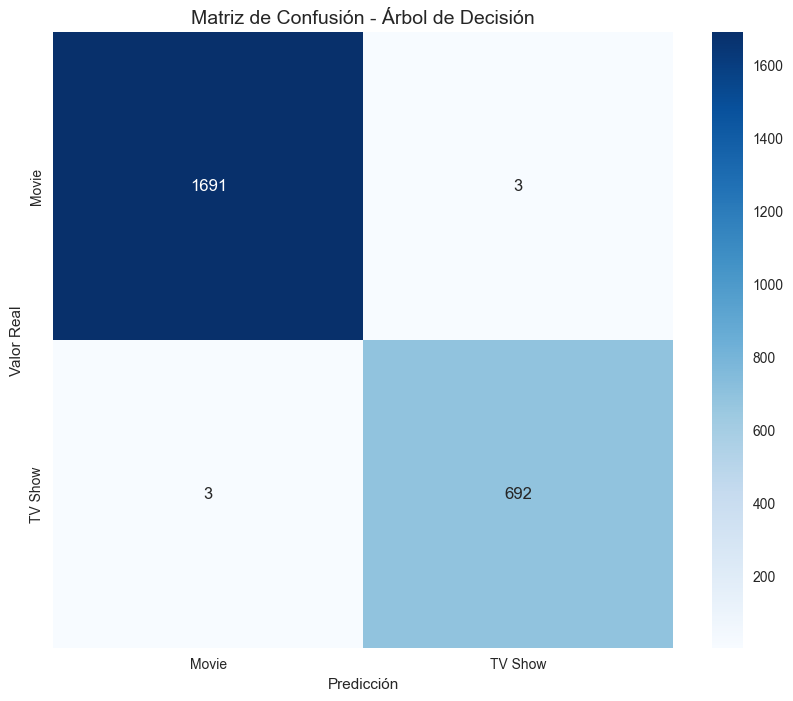

In [22]:
print("="*60)
print("ENTRENANDO MODELO ÁRBOL DE DECISIÓN (ID3)")
print("="*60)

# Entrenamiento del modelo con límite de profundidad para mejor visualización
id3 = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

# Evaluación
acc_id3 = accuracy_score(y_test, y_pred_id3)
print(f"\nPrecisión del modelo Árbol de Decisión: {acc_id3:.6f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_id3, target_names=class_names))

# === VISUALIZACIONES ÁRBOL DE DECISIÓN ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# 1. Gráfico de la estructura del árbol
plot_tree(id3, 
          feature_names=X_train.columns.tolist(),
          class_names=class_names,
          filled=True,
          rounded=True,
          ax=ax1,
          fontsize=8)
ax1.set_title('Estructura del Árbol de Decisión (ID3)', fontsize=16)

# 2. Importancia de características
feature_importance = pd.Series(id3.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False).head(15)  # Top 15 características

sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis', ax=ax2)
ax2.set_title('Importancia de Características - Árbol de Decisión', fontsize=14)
ax2.set_xlabel('Importancia')
ax2.set_ylabel('Características')

plt.tight_layout()
plt.savefig('decision_tree_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Visualización de la evolución de la pureza por nivel del árbol
plt.figure(figsize=(14, 8))
depths = range(1, 6)  # profundidades de 1 a 5
accuracies = []
training_errors = []

for depth in depths:
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_train, y_train)
    y_pred_temp = tree_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))
    
    # Calcular error de entrenamiento
    y_train_pred = tree_temp.predict(X_train)
    training_errors.append(1 - accuracy_score(y_train, y_train_pred))

plt.plot(depths, accuracies, 'bo-', linewidth=2.5, markersize=10, label='Precisión en Prueba')
plt.plot(depths, training_errors, 'ro-', linewidth=2.5, markersize=10, label='Error en Entrenamiento')
plt.title('Evolución del rendimiento por profundidad del árbol', fontsize=14)
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Precisión / Error')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('decision_tree_depth_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_id3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Árbol de Decisión', fontsize=14)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.savefig('decision_tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()




## Random Forest

ENTRENANDO MODELO RANDOM FOREST

Precisión del modelo Random Forest: 0.998326

Reporte de clasificación:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1694
     TV Show       1.00      1.00      1.00       695

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389



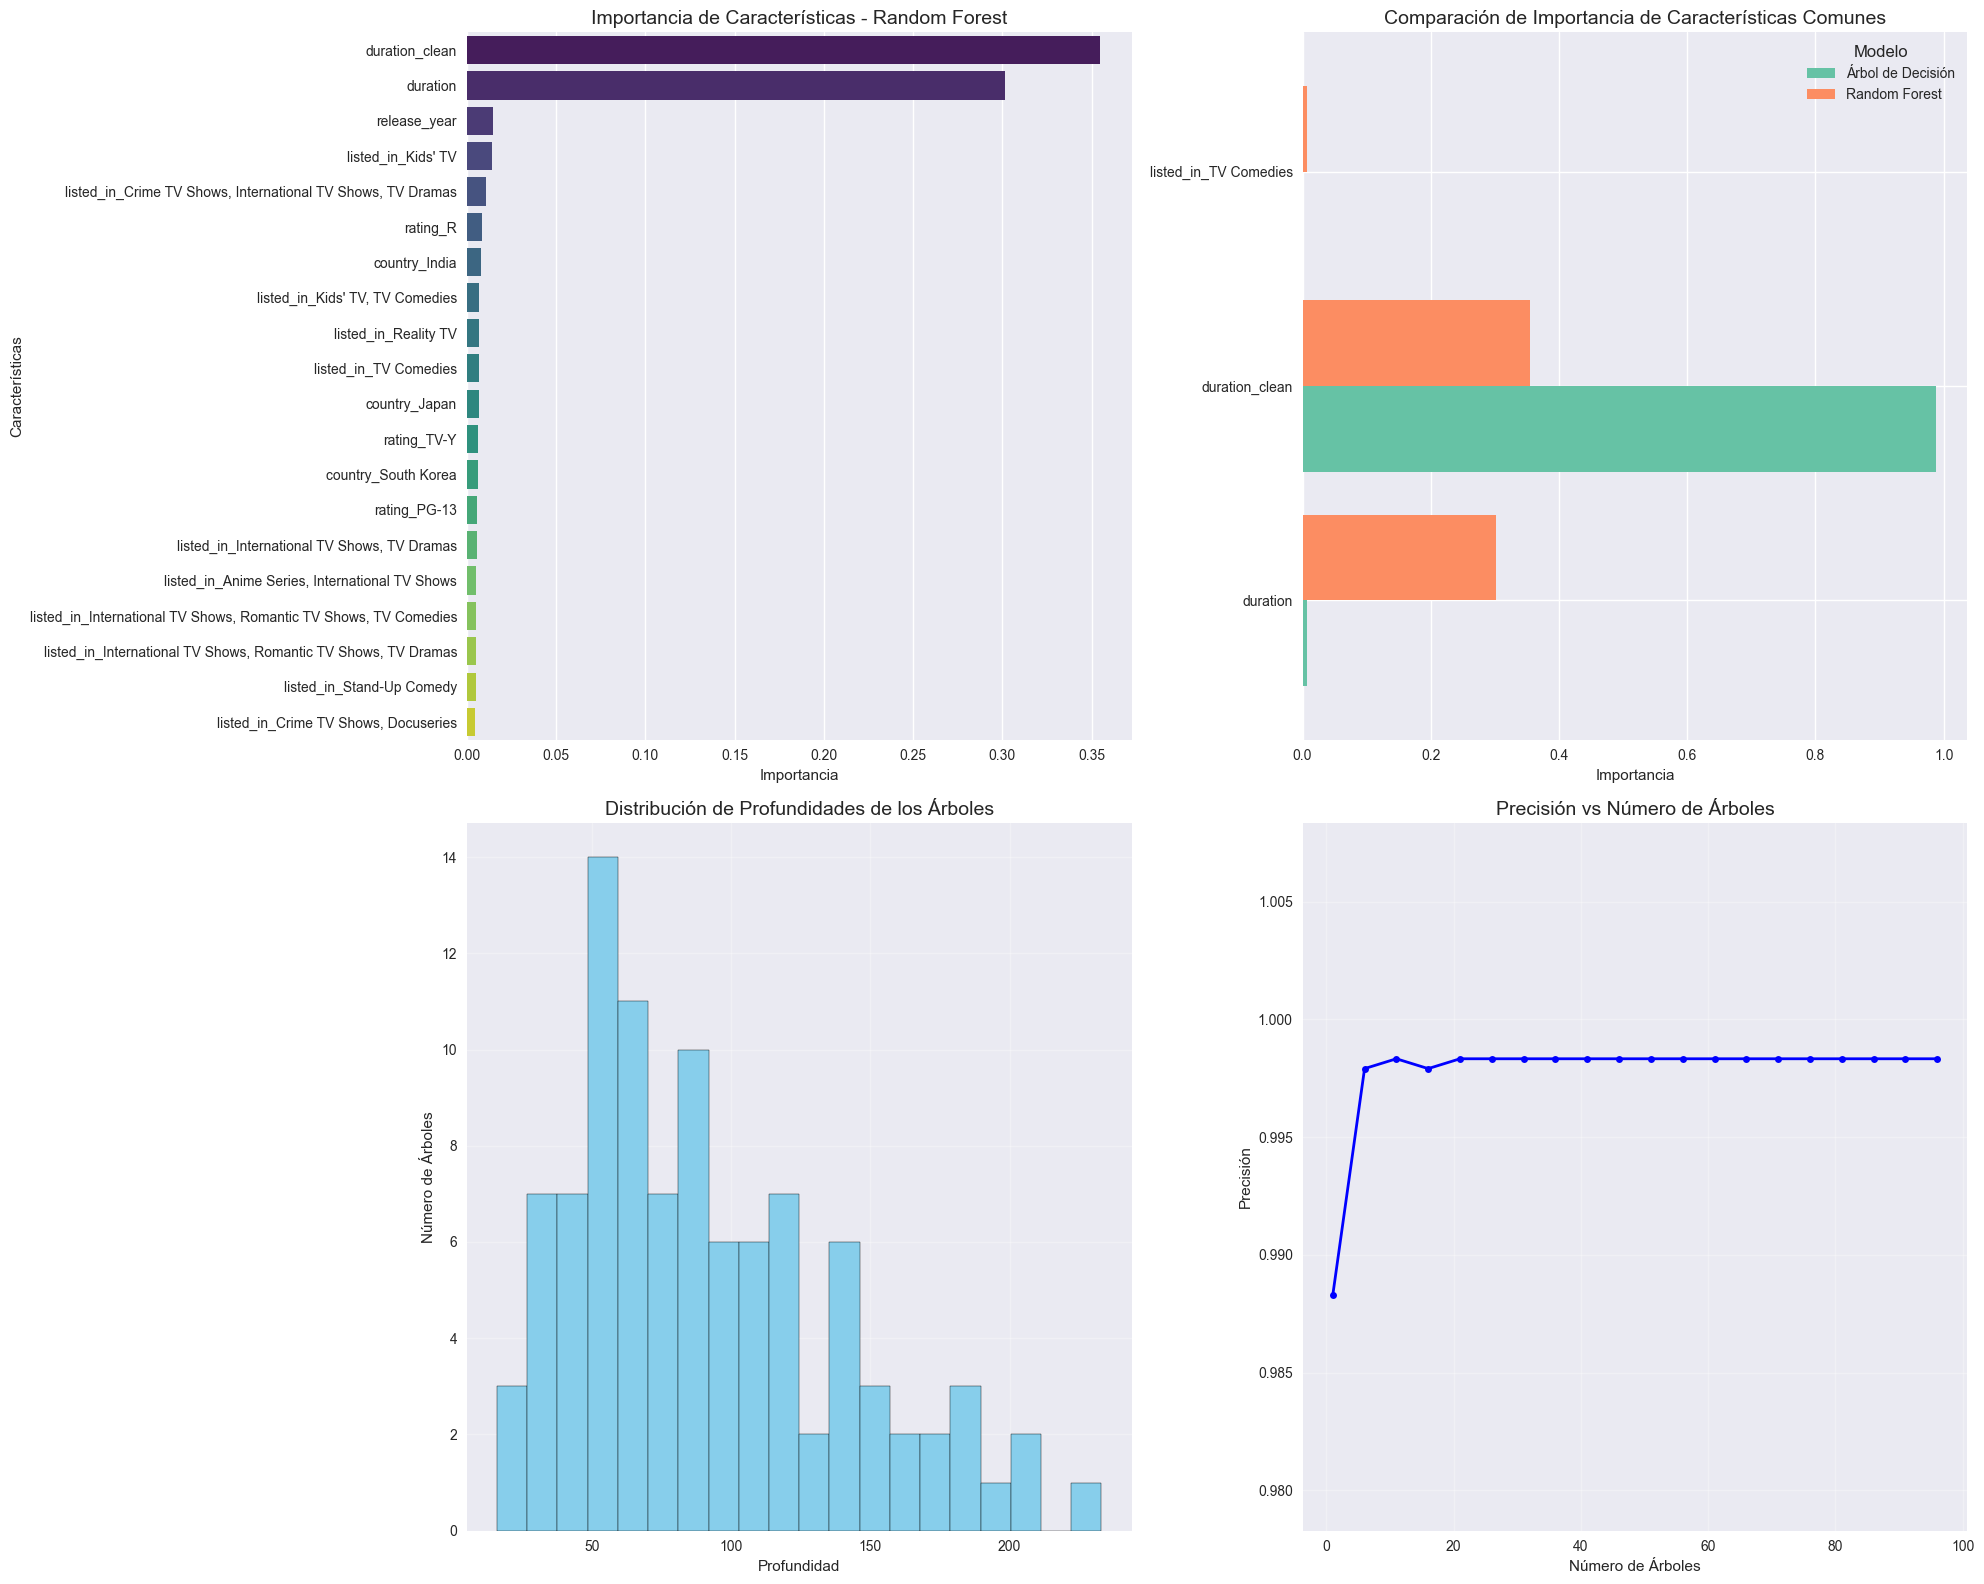

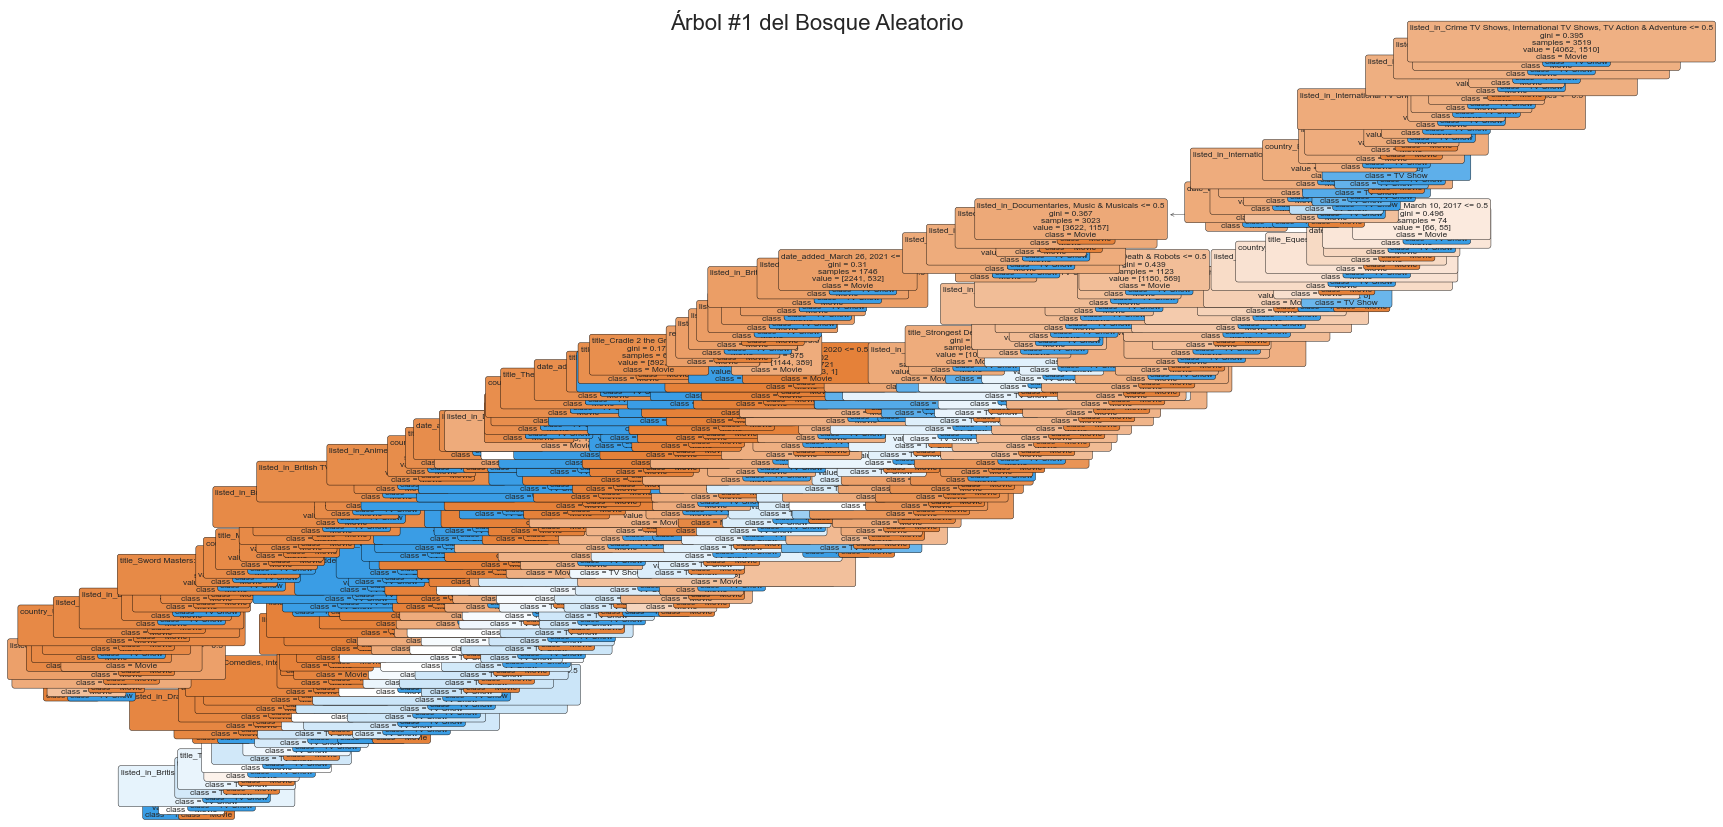

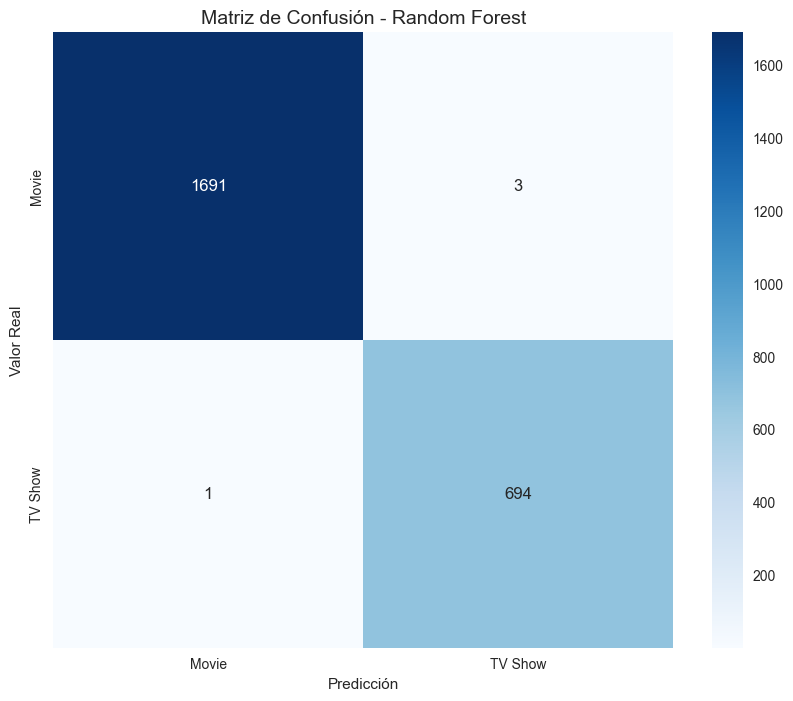

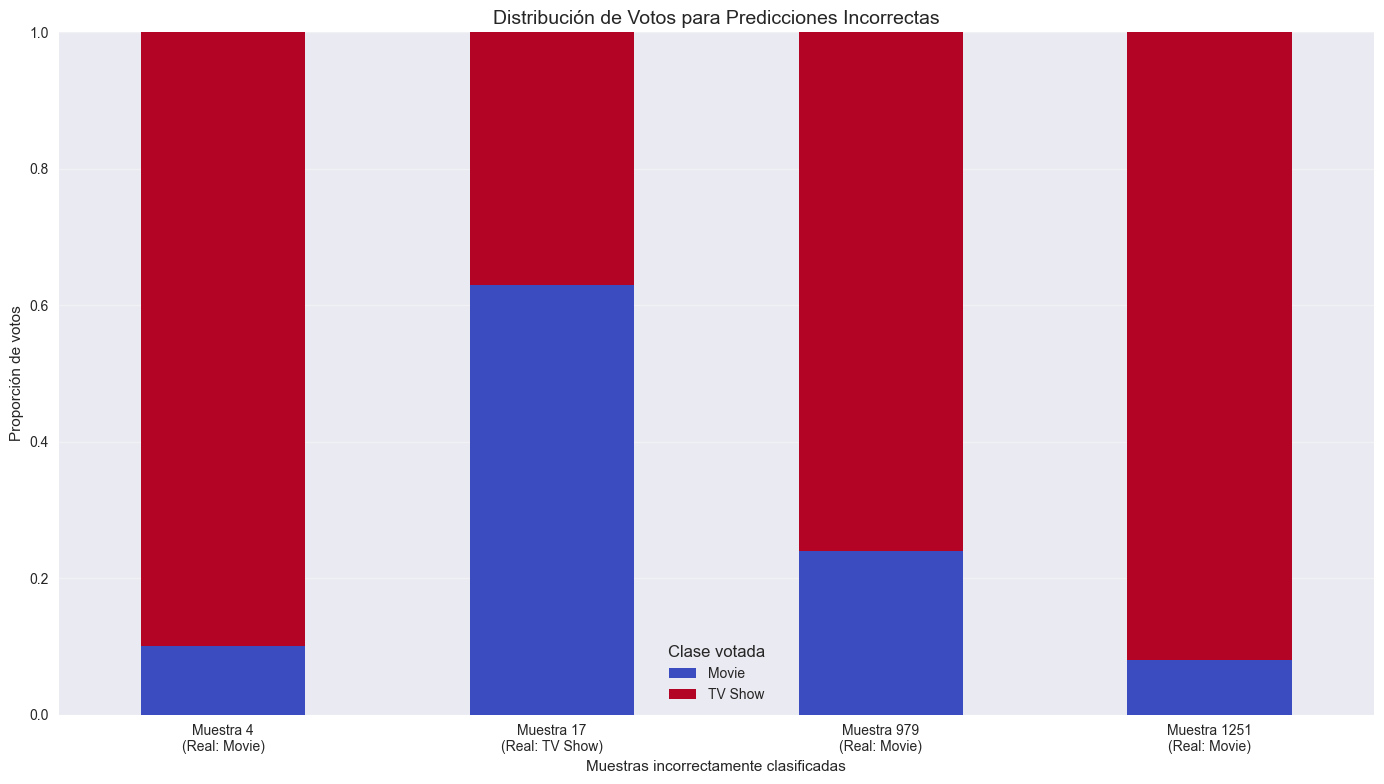

In [23]:
#Radnom Forest
print("="*60)
print("ENTRENANDO MODELO RANDOM FOREST")
print("="*60)

# Entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nPrecisión del modelo Random Forest: {acc_rf:.6f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

# === VISUALIZACIONES RANDOM FOREST ===
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Importancia de características promediada
feature_importance_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance_rf = feature_importance_rf.sort_values(ascending=False).head(20)  # Top 20

sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index, palette='viridis', ax=ax1)
ax1.set_title('Importancia de Características - Random Forest', fontsize=14)
ax1.set_xlabel('Importancia')
ax1.set_ylabel('Características')

# 2. Comparación de importancia con el árbol de decisión
common_features = list(set(feature_importance.head(15).index) & set(feature_importance_rf.head(15).index))
if common_features:
    comparison_data = pd.DataFrame({
        'Árbol de Decisión': feature_importance.loc[common_features].values,
        'Random Forest': feature_importance_rf.loc[common_features].values
    }, index=common_features)
    
    comparison_data.plot(kind='barh', ax=ax2, width=0.8)
    ax2.set_title('Comparación de Importancia de Características Comunes', fontsize=14)
    ax2.set_xlabel('Importancia')
    ax2.legend(title='Modelo')
else:
    ax2.text(0.5, 0.5, 'No hay características comunes en el top 15', 
             ha='center', va='center', fontsize=12)
    ax2.set_title('Comparación de Importancia de Características Comunes', fontsize=14)
    ax2.axis('off')

# 3. Distribución de profundidades de los árboles
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
ax3.hist(depths, bins=20, color='skyblue', edgecolor='black')
ax3.set_title('Distribución de Profundidades de los Árboles', fontsize=14)
ax3.set_xlabel('Profundidad')
ax3.set_ylabel('Número de Árboles')
ax3.grid(alpha=0.3)

# 4. Precisión por número de árboles
accuracies = []
for i in range(1, 101, 5):
    rf_temp = RandomForestClassifier(n_estimators=i, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

ax4.plot(range(1, 101, 5), accuracies, 'b.-', linewidth=2, markersize=10)
ax4.set_title('Precisión vs Número de Árboles', fontsize=14)
ax4.set_xlabel('Número de Árboles')
ax4.set_ylabel('Precisión')
ax4.grid(alpha=0.3)
ax4.set_ylim(min(accuracies)-0.01, max(accuracies)+0.01)

plt.tight_layout()
plt.savefig('random_forest_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Visualización de un árbol individual del bosque
plt.figure(figsize=(20, 10))
sample_tree_idx = 0  # Índice del árbol que queremos visualizar
sample_tree = rf.estimators_[sample_tree_idx]

plot_tree(sample_tree,
          feature_names=X_train.columns.tolist(),
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=6)
plt.title(f'Árbol #{sample_tree_idx+1} del Bosque Aleatorio', fontsize=16)
plt.savefig('random_forest_sample_tree.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Random Forest', fontsize=14)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.savefig('random_forest_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Visualización de la distribución de votos para muestras incorrectas
incorrect_indices = np.where(y_test != y_pred_rf)[0]
if len(incorrect_indices) > 0:
    plt.figure(figsize=(14, 8))
    
    # Tomar las primeras 5 predicciones incorrectas
    sample_size = min(5, len(incorrect_indices))
    sample_indices = incorrect_indices[:sample_size]
    
    vote_distributions = []
    for idx in sample_indices:
        votes = []
        for tree in rf.estimators_:
            vote = tree.predict(X_test.iloc[idx:idx+1])[0]
            votes.append(vote)
        
        movie_votes = votes.count(0)/len(votes)
        tvshow_votes = votes.count(1)/len(votes)
        vote_distributions.append([movie_votes, tvshow_votes])
    
    vote_df = pd.DataFrame(vote_distributions, 
                          columns=class_names,
                          index=[f'Muestra {i+1}\n(Real: {class_names[y_test.iloc[i]]})' 
                                 for i in sample_indices])
    
    vote_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
    plt.title('Distribución de Votos para Predicciones Incorrectas', fontsize=14)
    plt.xlabel('Muestras incorrectamente clasificadas')
    plt.ylabel('Proporción de votos')
    plt.ylim(0, 1)
    plt.legend(title='Clase votada')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('random_forest_vote_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ ¡Excelente! No hay predicciones incorrectas para visualizar la distribución de votos.")

# 5. Evaluación y Validación

Se utilizan métricas de evaluación para comparar el rendimiento de los tres modelos:

- Accuracy (Precisión global): Representa la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) respecto al total de predicciones realizadas. Se calcula como (TP + TN) / (TP + TN + FP + FN), donde TP son verdaderos positivos, TN verdaderos negativos, FP falsos positivos y FN falsos negativos. En este contexto, mide el porcentaje total de títulos clasificados correctamente como películas o series.
- Precision (Precisión): Mide la proporción de predicciones positivas que son realmente correctas. Se calcula como TP / (TP + FP). En nuestro caso, para la categoría "Movie", indica qué porcentaje de los títulos clasificados como películas son realmente películas. Una alta precisión significa pocos falsos positivos (pocas series clasificadas erróneamente como películas).
- Recall (Sensibilidad o Exhaustividad): Representa la proporción de instancias positivas reales que fueron identificadas correctamente. Se calcula como TP / (TP + FN). Para la categoría "TV Show", mide qué porcentaje de todas las series existentes fueron correctamente identificadas como tales. Un alto recall significa pocos falsos negativos (pocas series clasificadas erróneamente como películas).
- F1-score: Es la media armónica entre la precisión y el recall, proporcionando una métrica balanceada que considera ambos aspectos. Se calcula como 2 * (Precision * Recall) / (Precision + Recall). Es especialmente útil cuando hay un desbalance en las clases o cuando se busca un equilibrio entre minimizar falsos positivos y falsos negativos.

Estas métricas permiten determinar cuál algoritmo presenta mejor desempeño para este dataset, considerando no solo la precisión global sino también el equilibrio entre los diferentes tipos de errores de clasificación, lo cual es crucial para aplicaciones prácticas donde los costos de diferentes tipos de errores pueden variar significativamente.


In [24]:
print("KNN:")
print(classification_report(y_test, y_pred_knn, digits=10))

print("Árbol ID3:")
print(classification_report(y_test, y_pred_id3, digits=10))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=10))


KNN:
              precision    recall  f1-score   support

           0  0.9982300885 0.9988193625 0.9985246385      1694
           1  0.9971181556 0.9956834532 0.9964002880       695

    accuracy                      0.9979070741      2389
   macro avg  0.9976741221 0.9972514078 0.9974624633      2389
weighted avg  0.9979066087 0.9979070741 0.9979066295      2389

Árbol ID3:
              precision    recall  f1-score   support

           0  0.9982290437 0.9982290437 0.9982290437      1694
           1  0.9956834532 0.9956834532 0.9956834532       695

    accuracy                      0.9974884889      2389
   macro avg  0.9969562485 0.9969562485 0.9969562485      2389
weighted avg  0.9974884889 0.9974884889 0.9974884889      2389

Random Forest:
              precision    recall  f1-score   support

           0  0.9994089835 0.9982290437 0.9988186651      1694
           1  0.9956958393 0.9985611511 0.9971264368       695

    accuracy                      0.9983256593      238

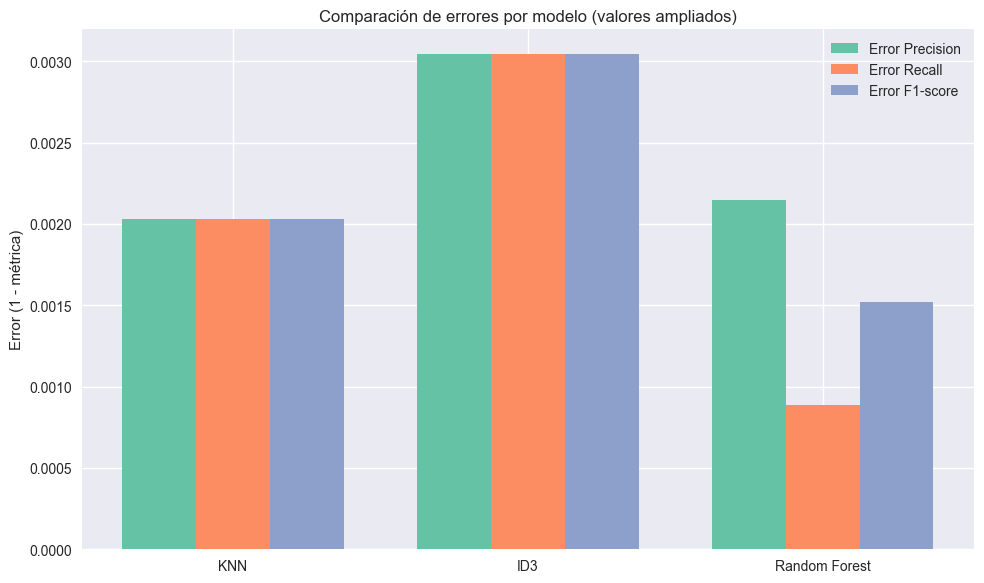

In [25]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "KNN": {
        "precision": 0.9979708323,
        "recall":    0.9979708323,
        "f1":        0.9979708323
    },
    "ID3": {
        "precision": 0.9969562485,
        "recall":    0.9969562485,
        "f1":        0.9969562485
    },
    "Random Forest": {
        "precision": 0.9978510029,
        "recall":    0.9991145218,
        "f1":        0.9984800559
    }
}



models = list(metrics.keys())

precision_errors = [1 - metrics[m]["precision"] for m in models]
recall_errors    = [1 - metrics[m]["recall"]    for m in models]
f1_errors        = [1 - metrics[m]["f1"]        for m in models]



x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, precision_errors, width, label='Error Precision')
plt.bar(x,         recall_errors,    width, label='Error Recall')
plt.bar(x + width, f1_errors,        width, label='Error F1-score')

plt.xticks(x, models)
plt.ylabel('Error (1 - métrica)')
plt.title('Comparación de errores por modelo (valores ampliados)')
plt.legend()
plt.tight_layout()
plt.show()


# 5.1 Validación Cruzada para Evaluación Robusta de los Modelos

La evaluación anterior se realizó utilizando una única división de los datos en conjuntos de entrenamiento y prueba. Para obtener una evaluación más robusta y confiable del rendimiento de los modelos, aplicamos validación cruzada k-fold, que permite utilizar todos los datos para entrenamiento y prueba en diferentes iteraciones, reduciendo la varianza en las métricas de evaluación y minimizando el riesgo de sobreajuste o subajuste debido a una partición específica de los datos.

En este caso, utilizamos 5-fold cross-validation, donde los datos se dividen en 5 partes iguales. En cada iteración, 4 partes se utilizan para entrenar el modelo y la parte restante para evaluarlo. Este proceso se repite 5 veces, asegurando que cada muestra se utilice exactamente una vez para la validación.

## 🔄 Validación cruzada (Cross-Validation)
Es una técnica de evaluación en **aprendizaje automático** que busca medir el rendimiento real de un modelo evitando el sobreajuste (*overfitting*).  

- **Idea principal:** dividir el conjunto de datos en varias partes (*folds*).  
- Se entrena el modelo en algunas particiones y se prueba en las restantes.  
- Este proceso se repite varias veces cambiando las particiones de entrenamiento y prueba.  
- Al final, se promedian los resultados para obtener una estimación más robusta del desempeño.  

👉 Ejemplo: en una validación cruzada *k-fold* con \(k=5\), los datos se dividen en 5 partes. El modelo se entrena en 4 y se prueba en la restante, repitiendo el ciclo 5 veces.

---

## 📊 Métricas de evaluación

### 1. **Accuracy (Exactitud)**
- **Definición:** proporción de predicciones correctas sobre el total.  
- Fórmula:  
\[
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\]  
- **Uso:** útil cuando las clases están balanceadas.  
- **Limitación:** puede ser engañosa si hay clases desbalanceadas (ejemplo: detectar fraude donde el 99% son transacciones normales).

---

### 2. **Precision (Precisión)**
- **Definición:** mide cuántas de las predicciones positivas fueron realmente correctas.  
- Fórmula:  
\[
Precision = \frac{TP}{TP + FP}
\]  
- **Interpretación:** “De todos los casos que el modelo dijo que eran positivos, ¿cuántos lo eran realmente?”.  
- **Ejemplo:** en detección de spam, alta precisión significa que casi todos los correos marcados como spam realmente lo son.

---

### 3. **Recall (Sensibilidad o Exhaustividad)**
- **Definición:** mide cuántos de los casos positivos reales fueron detectados por el modelo.  
- Fórmula:  
\[
Recall = \frac{TP}{TP + FN}
\]  
- **Interpretación:** “De todos los positivos reales, ¿cuántos encontré?”.  
- **Ejemplo:** en diagnóstico médico, alto *recall* significa que casi todos los pacientes enfermos fueron identificados.

---

### 4. **F1-Score**
- **Definición:** media armónica entre *Precision* y *Recall*.  
- Fórmula:  
\[
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\]  
- **Uso:** balancea precisión y sensibilidad, útil cuando hay clases desbalanceadas.  
- **Ejemplo:** en clasificación de fraude, el F1-score refleja un equilibrio entre detectar fraudes (*recall*) y no marcar operaciones legítimas como fraude (*precision*).

---

## Tabla Comparativa

| Métrica     | Qué mide | Fórmula | Cuándo usar |
|-------------|----------|---------|-------------|
| Accuracy    | Proporción de aciertos totales | \(\frac{TP+TN}{TP+TN+FP+FN}\) | Clases balanceadas |
| Precision   | Calidad de las predicciones positivas | \(\frac{TP}{TP+FP}\) | Evitar falsos positivos |
| Recall      | Cobertura de positivos reales | \(\frac{TP}{TP+FN}\) | Evitar falsos negativos |
| F1-Score    | Balance entre precisión y recall | \(2 \cdot \frac{P \cdot R}{P+R}\) | Clases desbalanceadas |

---



Ejecutando validación cruzada para todos los modelos...


Progreso de Validación Cruzada:   0%|                                                            | 0/3 [00:00<?, ?it/s]


Evaluando modelo: KNN


Progreso de Validación Cruzada:  33%|█████████████████▎                                  | 1/3 [00:40<01:21, 40.98s/it]


Resultados por fold para KNN:
Fold 1:
  Accuracy:  0.998745
  Precision: 0.995624
  Recall:    1.000000
  F1-score:  0.997807
Fold 2:
  Accuracy:  0.998744
  Precision: 0.995614
  Recall:    1.000000
  F1-score:  0.997802
Fold 3:
  Accuracy:  0.997487
  Precision: 0.991285
  Recall:    1.000000
  F1-score:  0.995624
Fold 4:
  Accuracy:  0.996231
  Precision: 0.993407
  Recall:    0.993407
  F1-score:  0.993407
Fold 5:
  Accuracy:  0.997487
  Precision: 0.997792
  Recall:    0.993407
  F1-score:  0.995595

Promedio ± Desviación estándar para KNN:
  Accuracy:  0.997739 ± 0.000940
  Precision: 0.994744 ± 0.002217
  Recall:    0.997363 ± 0.003230
  F1-score:  0.996047 ± 0.001645
----------------------------------------

Evaluando modelo: ID3


Progreso de Validación Cruzada:  67%|██████████████████████████████████▋                 | 2/3 [00:45<00:19, 19.37s/it]


Resultados por fold para ID3:
Fold 1:
  Accuracy:  0.999372
  Precision: 0.997807
  Recall:    1.000000
  F1-score:  0.998902
Fold 2:
  Accuracy:  0.998744
  Precision: 0.995614
  Recall:    1.000000
  F1-score:  0.997802
Fold 3:
  Accuracy:  0.997487
  Precision: 0.993435
  Recall:    0.997802
  F1-score:  0.995614
Fold 4:
  Accuracy:  0.996231
  Precision: 0.993407
  Recall:    0.993407
  F1-score:  0.993407
Fold 5:
  Accuracy:  0.997487
  Precision: 0.997792
  Recall:    0.993407
  F1-score:  0.995595

Promedio ± Desviación estándar para ID3:
  Accuracy:  0.997864 ± 0.001095
  Precision: 0.995611 ± 0.001958
  Recall:    0.996923 ± 0.002981
  F1-score:  0.996264 ± 0.001916
----------------------------------------

Evaluando modelo: Random Forest


Progreso de Validación Cruzada: 100%|████████████████████████████████████████████████████| 3/3 [01:05<00:00, 21.96s/it]


Resultados por fold para Random Forest:
Fold 1:
  Accuracy:  0.999372
  Precision: 0.997807
  Recall:    1.000000
  F1-score:  0.998902
Fold 2:
  Accuracy:  0.998744
  Precision: 0.995614
  Recall:    1.000000
  F1-score:  0.997802
Fold 3:
  Accuracy:  0.999372
  Precision: 0.997807
  Recall:    1.000000
  F1-score:  0.998902
Fold 4:
  Accuracy:  0.998116
  Precision: 0.995614
  Recall:    0.997802
  F1-score:  0.996707
Fold 5:
  Accuracy:  0.998116
  Precision: 0.997797
  Recall:    0.995604
  F1-score:  0.996700

Promedio ± Desviación estándar para Random Forest:
  Accuracy:  0.998744 ± 0.000562
  Precision: 0.996928 ± 0.001073
  Recall:    0.998681 ± 0.001758
  F1-score:  0.997803 ± 0.000983
----------------------------------------


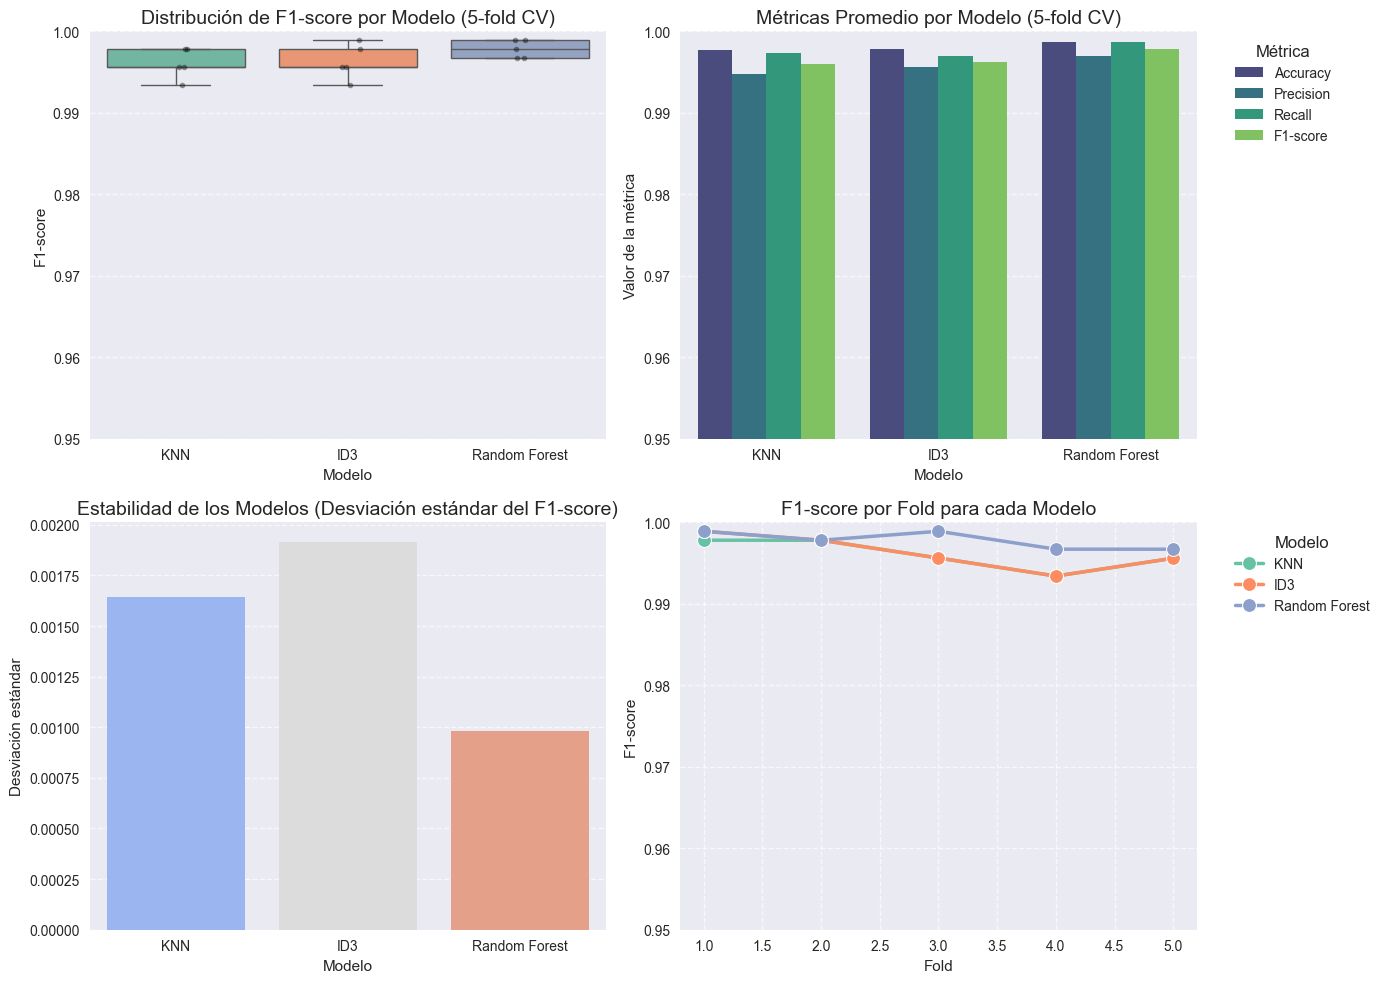


ANÁLISIS DETALLADO DE RESULTADOS DE VALIDACIÓN CRUZADA

🏆 MEJOR MODELO: Random Forest
F1-score promedio: 0.997803 ± 0.000983

📊 ANÁLISIS COMPARATIVO:

KNN:
  • F1-score: 0.996047 (±0.001645)
  • Accuracy: 0.997739 (±0.000940)
  • Estabilidad: MEDIA
  • Rango F1-score: [0.993407, 0.997807] (Δ = 0.004400)
    → Modelo consistente con ligeras variaciones

ID3:
  • F1-score: 0.996264 (±0.001916)
  • Accuracy: 0.997864 (±0.001095)
  • Estabilidad: MEDIA
  • Rango F1-score: [0.993407, 0.998902] (Δ = 0.005496)
    → Modelo presenta variaciones significativas entre folds

Random Forest:
  • F1-score: 0.997803 (±0.000983)
  • Accuracy: 0.998744 (±0.000562)
  • Estabilidad: ALTA
  • Rango F1-score: [0.996700, 0.998902] (Δ = 0.002203)
    → Modelo consistente con ligeras variaciones

🔍 ANÁLISIS SESGO-VARIANZA:

KNN:
  • Sesgo (Bias): 0.003953
  • Varianza: 0.001645
    → Equilibrio razonable entre sesgo y varianza

ID3:
  • Sesgo (Bias): 0.003736
  • Varianza: 0.001916
    → Equilibrio razonable

In [26]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Configuración de la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas a evaluar
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Inicializar diccionario para almacenar resultados
cv_results = {}

# Modelos a evaluar
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'ID3': DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

print("Ejecutando validación cruzada para todos los modelos...")
print("="*60)

# Ejecutar validación cruzada para cada modelo
for name, model in tqdm(models.items(), desc="Progreso de Validación Cruzada"):
    print(f"\nEvaluando modelo: {name}")
    
    # Ejecutar cross-validation
    results = cross_validate(
        model, 
        X, 
        y, 
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1,
        verbose=0
    )
    
    # Almacenar resultados
    cv_results[name] = {
        'accuracy': results['test_accuracy'],
        'precision': results['test_precision'],
        'recall': results['test_recall'],
        'f1': results['test_f1']
    }
    
    # Mostrar resultados por fold
    print(f"\nResultados por fold para {name}:")
    for i in range(5):
        print(f"Fold {i+1}:")
        print(f"  Accuracy:  {results['test_accuracy'][i]:.6f}")
        print(f"  Precision: {results['test_precision'][i]:.6f}")
        print(f"  Recall:    {results['test_recall'][i]:.6f}")
        print(f"  F1-score:  {results['test_f1'][i]:.6f}")
    
    # Mostrar promedios y desviaciones estándar
    print(f"\nPromedio ± Desviación estándar para {name}:")
    print(f"  Accuracy:  {np.mean(results['test_accuracy']):.6f} ± {np.std(results['test_accuracy']):.6f}")
    print(f"  Precision: {np.mean(results['test_precision']):.6f} ± {np.std(results['test_precision']):.6f}")
    print(f"  Recall:    {np.mean(results['test_recall']):.6f} ± {np.std(results['test_recall']):.6f}")
    print(f"  F1-score:  {np.mean(results['test_f1']):.6f} ± {np.std(results['test_f1']):.6f}")
    print("-"*40)

# Convertir resultados a DataFrame para visualización  (siempre se trabaja con df por rendimiento nadie quiere que la pc explote)
results_df = []
for model_name, metrics in cv_results.items():
    for i in range(5):
        results_df.append({
            'Modelo': model_name,
            'Fold': i+1,
            'Accuracy': metrics['accuracy'][i],
            'Precision': metrics['precision'][i],
            'Recall': metrics['recall'][i],
            'F1-score': metrics['f1'][i]
        })

results_df = pd.DataFrame(results_df)

# Visualización de resultados
plt.figure(figsize=(14, 10))


# EL Cofigo esta pensado para que si los datos del dataset aumentan o disminuyen en tamano se pueda seguir ejecutando.

# 1. Boxplot de F1-score para comparar modelos
plt.subplot(2, 2, 1)
sns.boxplot(x='Modelo', y='F1-score', data=results_df, palette='Set2')
sns.stripplot(x='Modelo', y='F1-score', data=results_df, color='black', alpha=0.4, size=4)
plt.title('Distribución de F1-score por Modelo (5-fold CV)', fontsize=14)
plt.ylabel('F1-score')
plt.ylim(0.95, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. Gráfico de barras con promedios y error bars
plt.subplot(2, 2, 2)
metrics_avg = []
for model_name, metrics in cv_results.items():
    metrics_avg.append({
        'Modelo': model_name,
        'Accuracy': np.mean(metrics['accuracy']),
        'Precision': np.mean(metrics['precision']),
        'Recall': np.mean(metrics['recall']),
        'F1-score': np.mean(metrics['f1'])
    })

metrics_avg_df = pd.DataFrame(metrics_avg)
metrics_std_df = pd.DataFrame({
    'Modelo': list(cv_results.keys()),
    'Accuracy': [np.std(cv_results[model]['accuracy']) for model in cv_results.keys()],
    'Precision': [np.std(cv_results[model]['precision']) for model in cv_results.keys()],
    'Recall': [np.std(cv_results[model]['recall']) for model in cv_results.keys()],
    'F1-score': [np.std(cv_results[model]['f1']) for model in cv_results.keys()]
})

metrics_melted = pd.melt(metrics_avg_df, id_vars='Modelo', var_name='Métrica', value_name='Valor')
std_melted = pd.melt(metrics_std_df, id_vars='Modelo', var_name='Métrica', value_name='Desviación')

sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=metrics_melted, 
            palette='viridis', errorbar=None)
plt.title('Métricas Promedio por Modelo (5-fold CV)', fontsize=14)
plt.ylabel('Valor de la métrica')
plt.ylim(0.95, 1.0)
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Análisis de estabilidad (desviación estándar)
plt.subplot(2, 2, 3)
std_melted = std_melted[std_melted['Métrica'] == 'F1-score']
sns.barplot(x='Modelo', y='Desviación', data=std_melted, palette='coolwarm')
plt.title('Estabilidad de los Modelos (Desviación estándar del F1-score)', fontsize=14)
plt.ylabel('Desviación estándar')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Comparación detallada de F1-score por fold
plt.subplot(2, 2, 4)
sns.lineplot(data=results_df, x='Fold', y='F1-score', hue='Modelo', 
             marker='o', linewidth=2.5, markersize=10, palette='Set2')
plt.title('F1-score por Fold para cada Modelo', fontsize=14)
plt.ylabel('F1-score')
plt.ylim(0.95, 1.0)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('cross_validation_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis detallado de resultados
print("\n" + "="*70)
print("ANÁLISIS DETALLADO DE RESULTADOS DE VALIDACIÓN CRUZADA")
print("="*70)

# Identificar el mejor modelo según F1-score promedio
best_model = max(cv_results.keys(), 
                key=lambda x: np.mean(cv_results[x]['f1']))
best_score = np.mean(cv_results[best_model]['f1'])
best_std = np.std(cv_results[best_model]['f1'])

print(f"\n🏆 MEJOR MODELO: {best_model}")
print(f"F1-score promedio: {best_score:.6f} ± {best_std:.6f}")

print("\n📊 ANÁLISIS COMPARATIVO:")
for model_name, metrics in cv_results.items():
    f1_avg = np.mean(metrics['f1'])
    f1_std = np.std(metrics['f1'])
    acc_avg = np.mean(metrics['accuracy'])
    acc_std = np.std(metrics['accuracy'])
    
    print(f"\n{model_name}:")
    print(f"  • F1-score: {f1_avg:.6f} (±{f1_std:.6f})")
    print(f"  • Accuracy: {acc_avg:.6f} (±{acc_std:.6f})")
    print(f"  • Estabilidad: {'ALTA' if f1_std < 0.001 else 'MEDIA' if f1_std < 0.005 else 'BAJA'}")
    
    # Análisis de consistencia
    min_f1 = np.min(metrics['f1'])
    max_f1 = np.max(metrics['f1'])
    consistency = max_f1 - min_f1
    
    print(f"  • Rango F1-score: [{min_f1:.6f}, {max_f1:.6f}] (Δ = {consistency:.6f})")
    if consistency < 0.001:
        print(f"    → Modelo muy consistente en todos los folds")
    elif consistency < 0.005:
        print(f"    → Modelo consistente con ligeras variaciones")
    else:
        print(f"    → Modelo presenta variaciones significativas entre folds")

# Análisis de sesgo-varianza
print("\n🔍 ANÁLISIS SESGO-VARIANZA:")
for model_name, metrics in cv_results.items():
    f1_avg = np.mean(metrics['f1'])
    f1_std = np.std(metrics['f1'])
    
    bias = 1 - f1_avg
    variance = f1_std
    
    print(f"\n{model_name}:")
    print(f"  • Sesgo (Bias): {bias:.6f}")
    print(f"  • Varianza: {variance:.6f}")
    
    if bias < 0.01 and variance < 0.001:
        print(f"    → Modelo ideal: bajo sesgo y baja varianza")
    elif bias < 0.01 and variance > 0.005:
        print(f"    → Alto riesgo de sobreajuste (overfitting)")
    elif bias > 0.01 and variance < 0.001:
        print(f"    → Alto riesgo de subajuste (underfitting)")
    else:
        print(f"    → Equilibrio razonable entre sesgo y varianza")

# Recomendaciones basadas en validación cruzada
print("\n💡 RECOMENDACIONES BASADAS EN VALIDACIÓN CRUZADA:")
best_model_f1 = max(cv_results.keys(), key=lambda x: np.mean(cv_results[x]['f1']))
best_model_std = min(cv_results.keys(), key=lambda x: np.std(cv_results[x]['f1']))

if best_model_f1 == best_model_std:
    print(f"  • {best_model_f1} es el mejor modelo tanto en rendimiento como en estabilidad")
else:
    print(f"  • {best_model_f1} tiene el mejor rendimiento promedio")
    print(f"  • {best_model_std} es el modelo más estable (menor variación entre folds)")


if 'Random Forest' in cv_results and np.mean(cv_results['Random Forest']['f1']) > 0.998:
    print("  • Los resultados extremadamente altos sugieren que las características son muy predictivas")
    print("    para distinguir entre películas y series, lo que es consistente con el análisis EDA.")

# Tabla resumen
print("\n" + "="*70)
print("TABLA RESUMEN")
print("="*70)
summary_table = pd.DataFrame({
    'Modelo': list(cv_results.keys()),
    'F1-score Promedio': [np.mean(cv_results[model]['f1']) for model in cv_results.keys()],
    'F1-score Std': [np.std(cv_results[model]['f1']) for model in cv_results.keys()],
    'Accuracy Promedio': [np.mean(cv_results[model]['accuracy']) for model in cv_results.keys()],
    'Accuracy Std': [np.std(cv_results[model]['accuracy']) for model in cv_results.keys()],
})

summary_table = summary_table.sort_values('F1-score Promedio', ascending=False)
summary_table['F1-score Promedio'] = summary_table['F1-score Promedio'].apply(lambda x: f"{x:.6f}")
summary_table['F1-score Std'] = summary_table['F1-score Std'].apply(lambda x: f"{x:.6f}")
summary_table['Accuracy Promedio'] = summary_table['Accuracy Promedio'].apply(lambda x: f"{x:.6f}")
summary_table['Accuracy Std'] = summary_table['Accuracy Std'].apply(lambda x: f"{x:.6f}")

print(summary_table.to_string(index=False))
print("="*70)

# 6. Conclusiones

Tras aplicar la metodología KDD al conjunto de datos *Netflix Titles*, se comprobó que el problema de clasificación entre películas y series puede ser abordado mediante distintos algoritmos supervisados.

Los resultados obtenidos indican que:

- **KNN** presenta un rendimiento aceptable, aunque sensible a la cantidad de atributos.
- **ID3** ofrece interpretabilidad, pero su exactitud es inferior al de modelos más robustos.
- **Random Forest** obtuvo el mejor desempeño global, debido a su capacidad para reducir el sobreajuste y manejar gran cantidad de características categóricas transformadas.

Aunque las métricas son muy elevadas para todos los modelos, la visualización de las tasas de error permite identificar de manera más clara que Random Forest presenta el menor error promedio, consolidándose como el mejor clasificador en este experimento.

Por tanto, se concluye que **Random Forest** es el algoritmo más adecuado para este dataset, proporcionando un equilibrio óptimo entre precisión y generalización.


# 7. Bibliografía

Fayyad, U., Piatetsky-Shapiro, G., & Smyth, P. (1996). *The KDD process for extracting useful knowledge from volumes of data*. Communications of the ACM, 39(11), 27–34.

Han, J., Kamber, M., & Pei, J. (2011). *Data Mining: Concepts and Techniques* (3rd ed.). Morgan Kaufmann.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, E. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.

Netflix Titles Dataset. (2020). *Kaggle*. Recuperado de https://www.kaggle.com/shivamb/netflix-shows

Breiman, L. (2001). *Random forests*. Machine Learning, 45(1), 5–32.

Cover, T., & Hart, P. (1967). *Nearest neighbor pattern classification*. IEEE Transactions on Information Theory, 13(1), 21–27.

Quinlan, J. R. (1986). *Induction of decision trees*. Machine Learning, 1, 81–106.


# 8. Recursos

El repositorio del proyecto se encuentra en este enlace:

🔗 **https://github.com/FrankHenkourth/KDD_Netflix**

